In [1]:
#for data manipulation
import pandas as pd     
import numpy as np 

#for visualization
import matplotlib.pyplot as plt 
import seaborn as sns   
from matplotlib.pyplot import figure

##**Let's first read the data**

In [2]:
df = pd.read_csv('energydata_complete.csv')                                      #read the csv file
df.head()                                                                        #display

date  Appliances  lights  ...  Tdewpoint        rv1        rv2
0  2016-01-11 17:00:00          60      30  ...        5.3  13.275433  13.275433
1  2016-01-11 17:10:00          60      30  ...        5.2  18.606195  18.606195
2  2016-01-11 17:20:00          50      30  ...        5.1  28.642668  28.642668
3  2016-01-11 17:30:00          50      40  ...        5.0  45.410389  45.410389
4  2016-01-11 17:40:00          60      40  ...        4.9  10.084097  10.084097

[5 rows x 29 columns]

In [3]:
#df.tail()

#### Let's undertsand the dataframe

>Shape.

>Information about columns, missing values & data types.


In [4]:
#df.shape                                                                        #dimensions of the dataframe

In [5]:
df.info()                                                                        #dataframe info abot data and datatype wrt to each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

Looking at the outputs, firstly it is evident that the dataframe contains 28 Attributes/Features and 19735 observations.(i.e. 28 columns and 19735 rows)

Secondly, none of the values is misssing.(Hurray!! this will save some time)

Laslty, all the values are numeric with most of them as float, a few int.                            
Just one exception is the feature named 'date' whih is a string.





###Converting Date data type from string to datetime.
(```pd.to_datetime()``` is a function which converts string into date and time format)

In [6]:
from datetime import datetime                                                    #datetime lib for manipulating of dates and times
df['date'] = pd.to_datetime(df['date'], 
                           format='%Y-%m-%d %H:%M:%S')                           #convert the date string into date and time type
    

###First I add the colums Appliances and Lights since the analysis is to be carried out on the entire energy consumption.                         
###Also we'll rename the columns.

In [7]:
total_consumption= df['Appliances']+df['lights']                                 #Total of Appliances and Lights
df['Total_Energy_Consumption'] = total_consumption                               #Adding Total energy consumption column in the dataframe
new_df = df.rename(columns = {'date':'Date', 'T1':'Kitchen_Temp', 'RH_1':'Kitchen_Humidity', 
                     'T2':'Living_room_Temp', 'RH_2':'Living_room_Humidity', 
                     'T3':'Laundry_room Temp', 'RH_3':'Laundry_room_Humidity', 
                     'T4':'Office_Temp', 'RH_4':'Office_Humidity',
                     'T5':'Bathroom_Temp', 'RH_5':'Bathroom_Humidity', 
                     'T6':'Building_North_Temp', 'RH_6':'Building_North_Humidity',
                     'T7':'Ironing_room_Temp', 'RH_7':'Ironing _room_Humidity', 
                     'T8':'Childrens_room_Temp', 'RH_8':'Childrens_room_Humidity', 
                     'T9':'Parents_room_Temp','RH_9':'Parents_room_Humidity',
                     'T_out':'Outside_Temp','Press_mm_hg':'Outside_Press','RH_out':'Outside_Humidity',
                     'Tdewpoint':'Dewpoint_Temp'},
                     )                                                           #renaming columns for the ease of understanding

It's better to save this dataframe so that I won't need to perform all those preliminary tasks again.

In [8]:
new_df.to_csv("new_energy_df.csv")

In [9]:
 from google.colab import files
# files.download("new_energy_df.csv")                                            #downloaded in the system

###Let's take a look again at our dataframe



In [10]:
new_df.shape

(19735, 30)

In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      19735 non-null  datetime64[ns]
 1   Appliances                19735 non-null  int64         
 2   lights                    19735 non-null  int64         
 3   Kitchen_Temp              19735 non-null  float64       
 4   Kitchen_Humidity          19735 non-null  float64       
 5   Living_room_Temp          19735 non-null  float64       
 6   Living_room_Humidity      19735 non-null  float64       
 7   Laundry_room Temp         19735 non-null  float64       
 8   Laundry_room_Humidity     19735 non-null  float64       
 9   Office_Temp               19735 non-null  float64       
 10  Office_Humidity           19735 non-null  float64       
 11  Bathroom_Temp             19735 non-null  float64       
 12  Bathroom_Humidity 

Note now the increased column length from 29 to 30.                              
Also it can is seen that the type of the feature Date is now changed to datetime64[ns].

##**Let's start EDA process**

#Let's first understand Descriptive statistics    
## 1.Definition
Descriptive statistics are one of the fundamental “must knows” with any set of data. It gives you a general idea of trends in your data including:

*   The mean, mode, median and range.
*   Variance and standard deviation.
*   Skewness.
*   Count, maximum and minimum.

Descriptive statistics is useful because it allows you to take a large amount of data and summarize it. For example, let’s say you had data on the incomes of one million people. No one is going to want to read a million pieces of data; if they did, they wouldn’t be able to glean any useful information from it. On the other hand, if you summarize it, it becomes useful: an average wage, or a median income, is much easier to understand than reams of data.

Descriptive statistics can be further broken down into several sub-areas, like:

* Measures of central tendency.                                                   
* Measures of dispersion.                                                         
* Charts & graphs.                                                                    
* Shapes of Distributions.

The described method will help to see how data has been spread for numerical values. We can clearly see the minimum value, mean values, different percentile values, and maximum values.


In [12]:
new_df.describe()                                                                #summary of the data 

Appliances        lights  ...           rv2  Total_Energy_Consumption
count  19735.000000  19735.000000  ...  19735.000000              19735.000000
mean      97.694958      3.801875  ...     24.988033                101.496833
std      102.524891      7.935988  ...     14.496634                104.380829
min       10.000000      0.000000  ...      0.005322                 10.000000
25%       50.000000      0.000000  ...     12.497889                 50.000000
50%       60.000000      0.000000  ...     24.897653                 60.000000
75%      100.000000      0.000000  ...     37.583769                100.000000
max     1080.000000     70.000000  ...     49.996530               1110.000000

[8 rows x 29 columns]

#**BoxPlot of all features**

In [13]:
#Plotting with matplotlib

fig = plt.figure(figsize=(30, 30),dpi=500)      
plt.suptitle('Boxplot of all Features',fontsize=30,ha='center',
             va='bottom')

for i in range(1, new_df.shape[1]):         
    plt.subplot(5,6 , i)               
    f = plt.gca()
    plt.boxplot(new_df.iloc[:, i],whiskerprops={'color':'green','lw':1,'ls':'solid'})
    plt.xlabel(new_df.columns[i],fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)                        
plt.tight_layout()


**So, Boxplot essentially tells us where the bulk of data is lying along with max and min values of the attribute. In other words, it is the *'Measure of Central tendency of data'***.                                            
**Also, it shows the outliers (aka the extreme data points outside the displayed range).**                                                                     
**It is clearly seen that 23 out of 29 features have outliers.** 

These outliers result in wrong predictions.                                      
They can either be replaced or removed.                                                                     
That I'll decide later but first we need more insights from the data.

In [14]:
# import math
# n =19735
# Range = 1110-10
# intervals = math.sqrt(19735)
# Width_of_intervals = Range/intervals
# Width_of_intervals

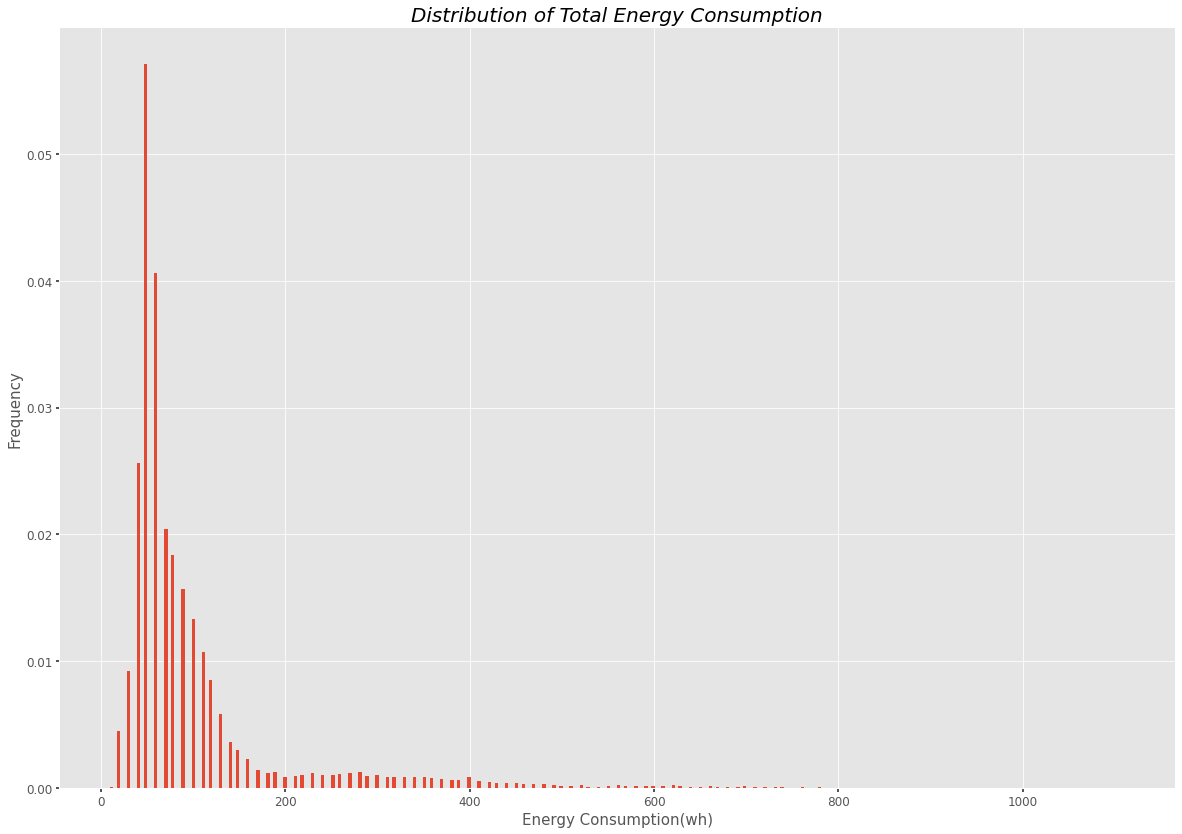

In [15]:
m = new_df['Total_Energy_Consumption']
plt.style.use('ggplot')
plt.figure(figsize=(20,14))
n, bins, patches = plt.hist(x=m, bins='auto', alpha=1, density=True)
plt.title("Distribution of Total Energy Consumption",fontsize=20,
          style='italic')
plt.xlabel("Energy Consumption(wh)",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.tick_params('both',labelsize=12,pad=3,width=2,grid_color='white')

#**Frequency Distribution plot for all features**
To plot distribution plot for all features in the dataframe (which are total 30 but we'll not consider date here.So, 29.

*   Created a figure using ```matplotlib``` 
*   ```for``` loop inorder to iterate over all columns and plot 




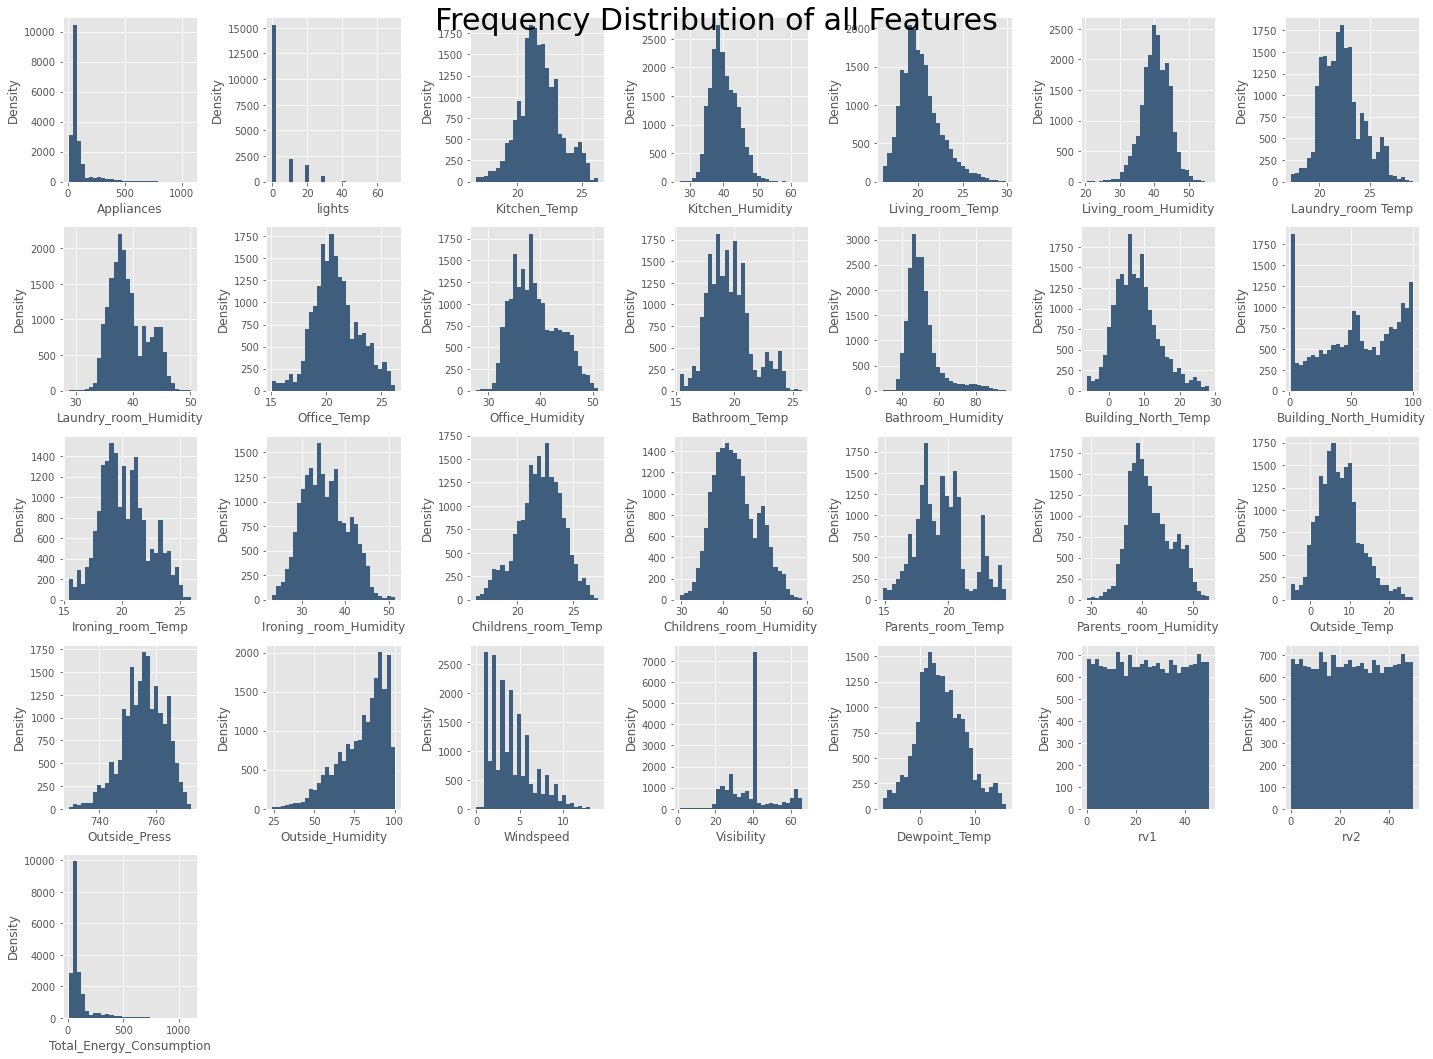

In [17]:
#Frequency distribution plot
fig = plt.figure(figsize=(20, 20))                                               #setting figure size
fig.suptitle('Frequency Distribution of all Features',fontsize=30,ha='center',
             va='bottom')

#since we want plot for all features of our Dataframe(here I say dataframe 
#beacause originally our dataset contains 29 features but I added 
#1 extra feature so now the total features are 30!!)

# loop over all vars (total: 30)

for i in range(1, new_df.shape[1]):                                              #iterating from column 1 till the shape of the nth
                                                                                 #dimension of dataframe(Datframe is of shape m*n:19735*30)
   
    plt.subplot(7, 7, i)                                                         #grid-size=6*6 and i=30(when i=1,first plot will be
                                                                                 #plotted in first cell of the grid i.e. in 1 first column and frist row)

    f = plt.gca()
    #f.set_title('Title-' + str(i))
    #f.axes.get_yaxis().set_visible(False)
    #f.axes.set_ylim([0, df.shape[0]])

    vals = np.size(new_df.iloc[:, i].unique())                                   #creating an array of size corresponding to all unique values of the features
    if vals < 10:
        bins = vals
    else:
        vals = 10

    plt.hist(new_df.iloc[:, i], bins=30, color='#3F5D7D')                        #plotting histogram
    plt.xlabel(new_df.columns[i])                                                #labelling each plot in the grid with the unique names of the features    
    plt.ylabel('Density')
plt.tight_layout()



From **Frequency Distribution** the number of times a feature occurs is evident. 

Frequency for different features gives an overview as follows:-

*   ***60*** wh **appliances** are the most utilized.
*   **Lights** of about ***10*** wh are mostly used.
*   **Total energy consumption \ Overall energy** consumed is around ***60*** wh.
*   It is seen that in **Kitchen** the *temperature* is ***22*** deg cel. and *humidity* is around ***40***%. Same behaviour is seen in **Living room**, **Laundry room** and **Office**.
*   But the **Bathroom** *temperture* is often low around ***18*** deg cel.      Conversely, the *humidity* is significantly high which is about ***50***%. The same data is evident of **Parents room**.
*   **Ironing room** *temperature* oscillates in the range of ***18-20*** deg cel, but with less *humid* conditions (approx. ***34***%). 
*   **Children's room** stays warmer than any other at about ***22*** deg cel.   Even *humidity* is high around ***42***%.
*   Obviously owing to the location which is "Belgium" it is cold outside and *temperature* is often low around the duration of analysis of the data set (approx. ***7*** deg cel.) with high *humidity* around ***83***%.                 
 *Pressure* is in between ***750-760*** mm hg.                                     
And yes, also less windy. *Windspeed* is more or less around ***3*** m/s.

Though it's a brief overview we understood the overall behaviour of the features.
We'll dive deeper with various other techniques.



#**Correlation Matrix and Correlation Heatmap**

In [18]:
corr = new_df.corr()

I have used ***masking*** for heatmap and therfore the next cell describes its code.


In [19]:
mask = np.zeros_like(corr, dtype=np.bool)                                        # np.zeros_like() returns an array of zeros with the same shape and type as the given array. 
                                                                                 #By passing in the correlation matrix, we get an array of zeros.
                                                                                 #The dtype=np.bool parameter overrides the data type, so our array is an array of booleans.

                                                                                 
mask[np.triu_indices_from(mask)]= True                                           #np.triu_indices_from(mask) returns the indices for the upper triangle of the array.
                                                                                 #set the upper triangle to True.


Text(0.5, 1.0, 'Correlation Heatmap of all features')

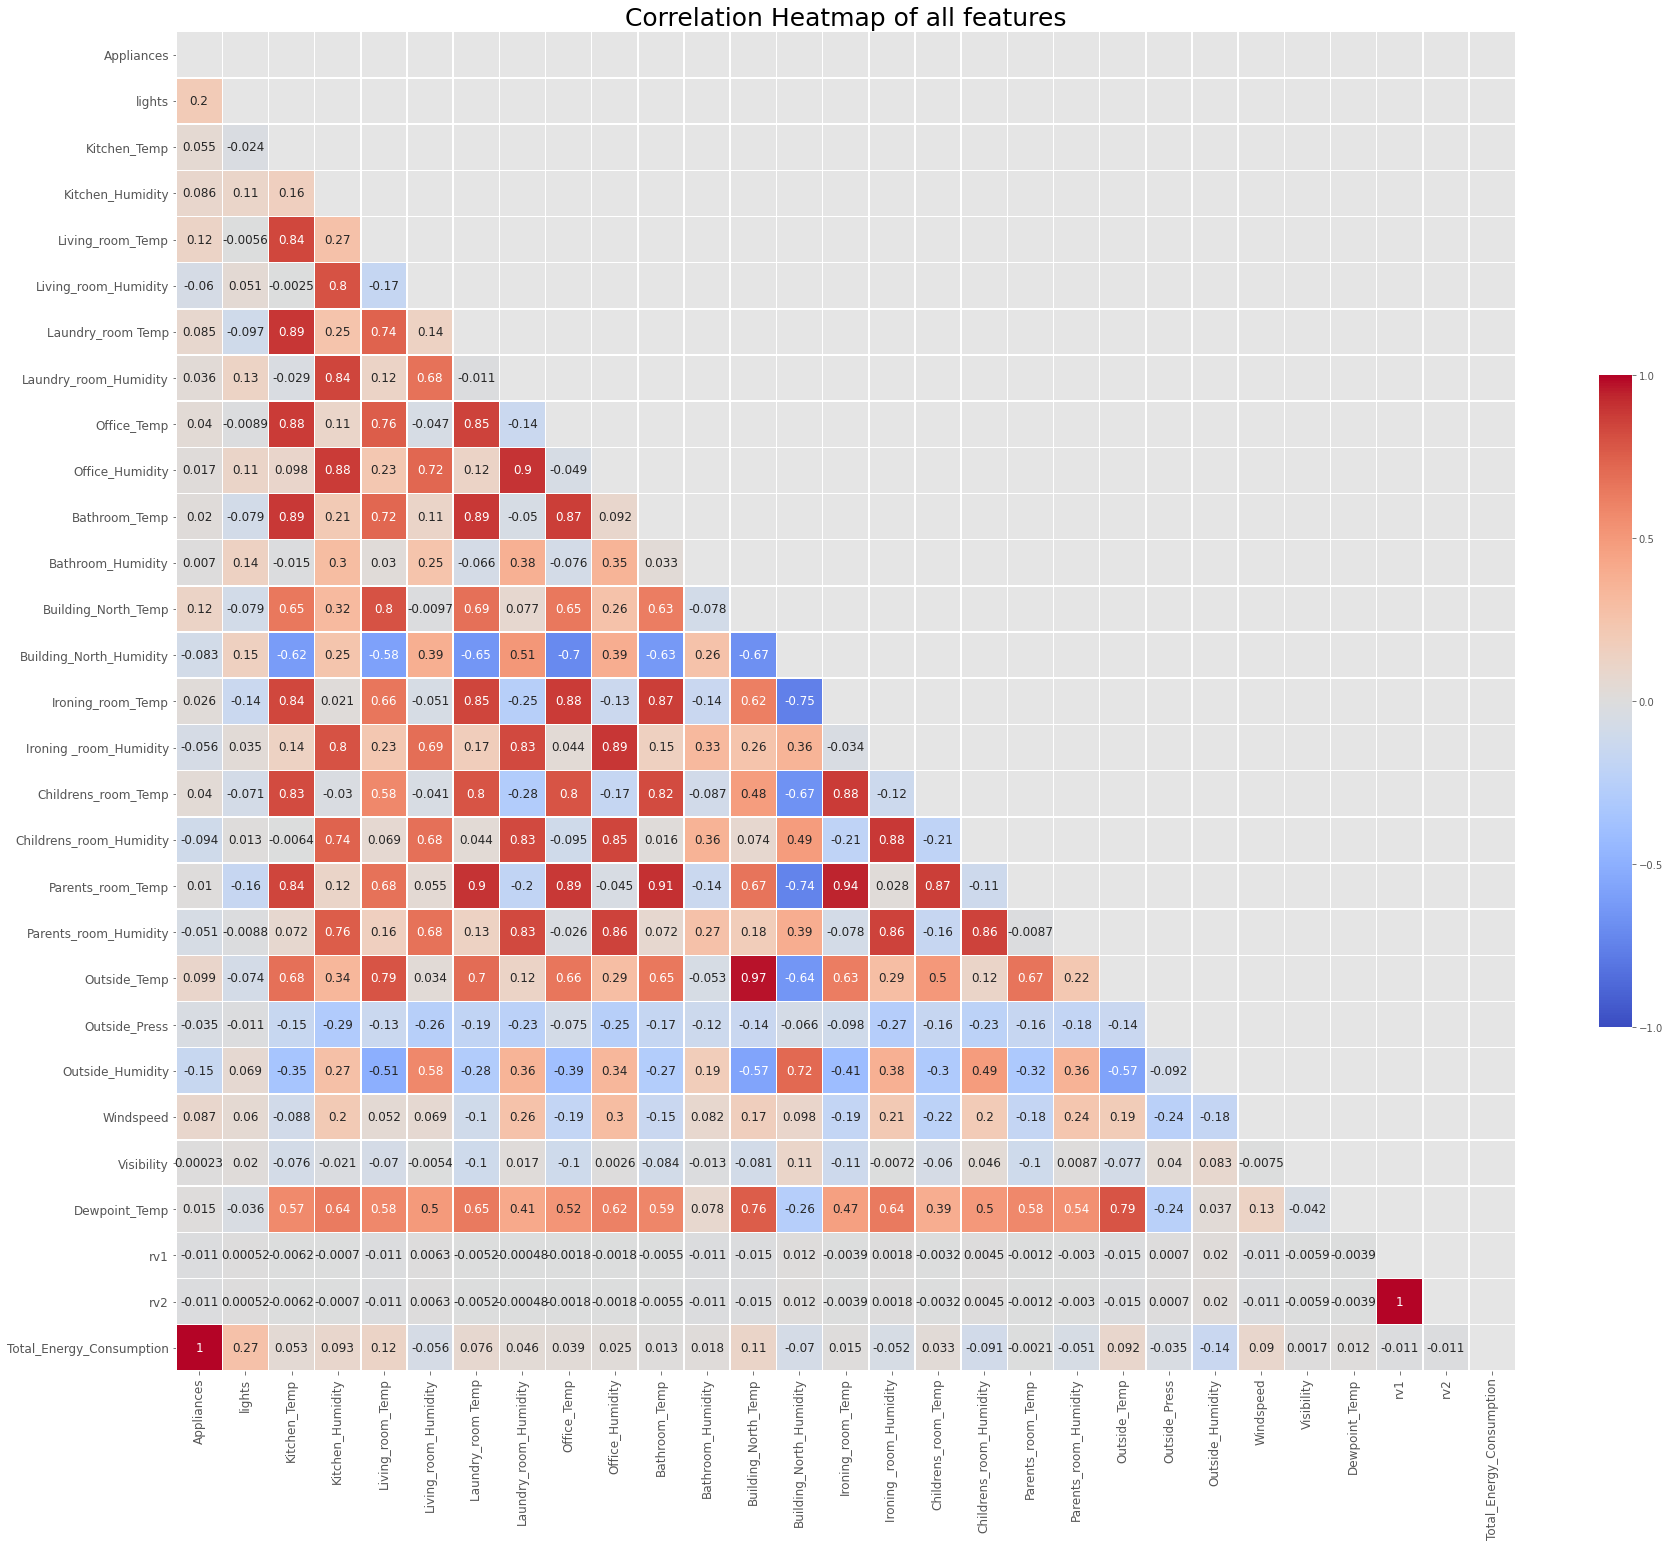

In [20]:
#This was the first code I used for heatmap but it gave a full grid output.

            # f, ax = plt.subplots(figsize=(30, 30))
            # cmap = sns.diverging_palette(230,90, as_cmap=True)
            # sns.heatmap(corr,annot = True,linewidths=.5,cmap = 'coolwarm')

#To improve and for ease of understanding let's implement the following 

f, ax = plt.subplots(figsize=(30, 30))                                              

heatmap = sns.heatmap(corr,                                                                                                                                                                                   
                      mask = mask,                                                                                                        
                      square = True,                                             #Makes each cell square-shaped.                                                                                 
                      linewidths = .5,                                           #Set width of the lines that will divide each cell to .5                                                           
                      cmap = 'coolwarm',                                         #Map data values to the coolwarm color space                                                                        
                      cbar_kws = {'shrink': .4,                                  #Shrink the legend size and label tick marks at [-1, -.5, 0, 0.5, 1]                                                       
                                'ticks' : [-1, -.5, 0, 0.5, 1]},                                                                                                
                      vmin = -1,                                                 #Set min value for color bar                                                                                     
                      vmax = 1,                                                  #Set max value for color bar                                                                  
                      annot = True,                                              #Turn on annotations for the correlation values and set annotations to size 12                                                                               
                      annot_kws = {'size': 12,})                                                                                                      
                                                                                                    
#add the column names as labels                                                         
ax.set_yticklabels(corr.columns, rotation = 0,fontsize=12)                       #Add column names to the y labels and rotate text to 0 degrees                                                                                                               
ax.set_xticklabels(corr.columns,fontsize=12)                                     ##Add column names to the x labels and fontsize to 12                                                                                          

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})                      #Show tickmarks on bottom and left of heatmap       
ax.set_title("Correlation Heatmap of all features",fontsize=25)
#heatmap.get_figure().savefig(‘heatmap.png’, bbox_inches=’tight’)                #Uncomment to save heatmap                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

##Let's understand what our **Correlation Heatmap** tells us. 

What is Heatmap?
> A heatmap is a graphical representation of data in which data values are represented as colors. That is, it uses color in order to communicate a value to the reader. This is a great tool to assist the audience towards the areas that matter the most when you have a large volume of data. 

Incorporating correlations in Heatmap will provide us with a **Correlation Heatmap**, as simple as that.                                                  
___
##Our interpretation from **Correlation Heatmap** :

#### The most significant relations that are evident are :-

(**Note** : Here we'll consider relations w.r.t ***Total Energy Consumption*** since the ultimate objective is to predict the consumption of energy which accounts for both Appliances and lights.)                                                            
####Positive Correlations                                              
>* The Strongest relation is seen with ***Living room temperature*** (**0.12**).      
* With ***North Side Building Temperature*** (**0.11**).
* With ***Kitchen Humidity*** (**0.093**).
* ***Laundry room Temperature*** (**0.076**).                                     
This means that Energy usage is high when there are ocuupants in this room.


* ***Outside Temperature*** (**0.092**).
* ***Windspeed** (**0.9**).                                                        
This indicates that with unfair weather conditions Energy utilization is more.   

####Negative Correlations                                                      
* ***Outside Humidity** (**0.14**).
* ***Childrens room Humidity*** (**0.91**).
* ***North Side Building Humidity*** (**0.7**).
* ***Living room Humidity*** (**0.56**).                                          
This tells us that the energy usage and these metrics are inversely proportional.

Well, no doubt that each metric affects the Overall energy usage but having known these values will help in feature selection while *Modelling*.






##For further analysis we will consider plotting graphs w.r.t **Month,Week,Day,Weekdays,Weekends** etc                                                           
Obviously, for that we need those columns as they are absent in the dataframe. But we have *timestamp* and we can create new columns that we want.
1. In pandas we have series functions for date time which is ```Series.dt.***``` which returns many useful attributes from the timestamp viz. ***month, month_name, week, weekday, day, day_name, hour, minutes, seconds,etc.***
For more information visit https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.date.html.
2. We will pull the required data using mentioned function and create new columns.


In [21]:
#new_df.Date.dt.month                                                            #returns month(eg.1,2,3...)

In [22]:
#new_df.Date.dt.day                                                              #returns day of the month(eg.1,5,10,31)

In [23]:
#hour = new_df.Date.dt.hour                                                      #returns hour from timestamp

In [24]:
#minute = new_df.Date.dt.minute                                                  #returns minute from the timestamp

In [25]:
new_df['Month_of_year'] = new_df.Date.dt.month_name()                            #adding month column corresponding to the date
new_df["Week_of_year"] = new_df.Date.dt.week                                     #adding Week of the year column corresponding to the date                   
new_df["Day"] = new_df.Date.dt.day                                               ##adding day of the month column corresponding to the date
new_df['Day_of_week'] = new_df.Date.dt.day_name()                                #adding weekday name column 
new_df["Weekday(1)/Weekend(0)"] = np.where(((new_df['Date']).dt.dayofweek) 
                                            > 4,0,1)                             #adding weekday column(weekday=1,weekend=0 boolean values)
new_df["Hour"] = new_df.Date.dt.hour                                             #adding hour column 

#rearranging column order
new_df = new_df[["Date","Appliances","lights","Kitchen_Temp","Kitchen_Humidity",
                 "Living_room_Temp","Living_room_Humidity","Laundry_room Temp",	
                 "Laundry_room_Humidity","Office_Temp","Office_Humidity",	
                 "Bathroom_Temp","Bathroom_Humidity","Building_North_Temp",	
                 "Building_North_Humidity","Ironing_room_Temp",	
                 "Ironing _room_Humidity",	"Childrens_room_Temp",	
                 "Childrens_room_Humidity",	"Parents_room_Temp",	
                 "Parents_room_Humidity", "Outside_Temp", "Outside_Press",	
                 "Outside_Humidity", "Windspeed",	"Visibility", 
                 "Dewpoint_Temp", "rv1", "rv2",	"Total_Energy_Consumption",
                 'Month_of_year', "Week_of_year", "Day", 'Day_of_week',
                 "Weekday(1)/Weekend(0)", "Hour"]]
new_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


Date  Appliances  ...  Weekday(1)/Weekend(0)  Hour
0 2016-01-11 17:00:00          60  ...                      1    17
1 2016-01-11 17:10:00          60  ...                      1    17
2 2016-01-11 17:20:00          50  ...                      1    17
3 2016-01-11 17:30:00          50  ...                      1    17
4 2016-01-11 17:40:00          60  ...                      1    17

[5 rows x 36 columns]

In [26]:
#Let's verify that apart from weekday=1, weekend=0 values are added or not
print(new_df[new_df["Weekday(1)/Weekend(0)"]==0])

                     Date  Appliances  ...  Weekday(1)/Weekend(0)  Hour
618   2016-01-16 00:00:00          50  ...                      0     0
619   2016-01-16 00:10:00          50  ...                      0     0
620   2016-01-16 00:20:00          30  ...                      0     0
621   2016-01-16 00:30:00          20  ...                      0     0
622   2016-01-16 00:40:00          40  ...                      0     0
...                   ...         ...  ...                    ...   ...
19045 2016-05-22 23:10:00          60  ...                      0    23
19046 2016-05-22 23:20:00          60  ...                      0    23
19047 2016-05-22 23:30:00          60  ...                      0    23
19048 2016-05-22 23:40:00          60  ...                      0    23
19049 2016-05-22 23:50:00          60  ...                      0    23

[5472 rows x 36 columns]


###Let's create new dataframes of each month

1. We will first check when the month ends.
2. Next using ```.iloc``` function we will pull the required data from the existing dataframe, store it in a dataframe using ```pd.Dataframe``` method and assign it to the respective variables.                                                              
Atlast, we will download this data in our directory so as to call whenever and wherever needed.
1. ```pd.to_csv``` will convert the dataframe into csv format.
2. And as we have already imported files module from google.colab library, we can readily download csv files.


In [27]:
#new_df[new_df.Date== '2016-05-01 18:00:00']                                     #uncomment this TO FIND THE MONTH START

In [28]:
jan = pd.DataFrame(new_df.iloc[:2922],index=None)
jan.reset_index(drop=True,inplace=True)
feb = pd.DataFrame(new_df.iloc[2923:7098])
feb.reset_index(drop=True,inplace=True)
mar = pd.DataFrame(new_df.iloc[7099:11562])
mar.reset_index(drop=True,inplace=True)
apr = pd.DataFrame(new_df.iloc[11563:15881])
apr.reset_index(drop=True,inplace=True)
may = pd.DataFrame(new_df.iloc[15882:19735])
may.reset_index(drop=True,inplace=True)
print(jan,feb,mar,apr,may)

                    Date  Appliances  ...  Weekday(1)/Weekend(0)  Hour
0    2016-01-11 17:00:00          60  ...                      1    17
1    2016-01-11 17:10:00          60  ...                      1    17
2    2016-01-11 17:20:00          50  ...                      1    17
3    2016-01-11 17:30:00          50  ...                      1    17
4    2016-01-11 17:40:00          60  ...                      1    17
...                  ...         ...  ...                    ...   ...
2917 2016-01-31 23:10:00          20  ...                      0    23
2918 2016-01-31 23:20:00          30  ...                      0    23
2919 2016-01-31 23:30:00          50  ...                      0    23
2920 2016-01-31 23:40:00          60  ...                      0    23
2921 2016-01-31 23:50:00          50  ...                      0    23

[2922 rows x 36 columns]                     Date  Appliances  ...  Weekday(1)/Weekend(0)  Hour
0    2016-02-01 00:10:00          50  ...          

In [29]:
# Function to add week of the month column in Dataframe
import math

def add_week_of_month(df):
    df['week_in_month'] = pd.to_numeric(df.Day/7)
    df['week_in_month'] = df['week_in_month'].apply(lambda x: math.ceil(x))
    return df

In [30]:
add_week_of_month(jan)

Date  Appliances  ...  Hour  week_in_month
0    2016-01-11 17:00:00          60  ...    17              2
1    2016-01-11 17:10:00          60  ...    17              2
2    2016-01-11 17:20:00          50  ...    17              2
3    2016-01-11 17:30:00          50  ...    17              2
4    2016-01-11 17:40:00          60  ...    17              2
...                  ...         ...  ...   ...            ...
2917 2016-01-31 23:10:00          20  ...    23              5
2918 2016-01-31 23:20:00          30  ...    23              5
2919 2016-01-31 23:30:00          50  ...    23              5
2920 2016-01-31 23:40:00          60  ...    23              5
2921 2016-01-31 23:50:00          50  ...    23              5

[2922 rows x 37 columns]

In [31]:
add_week_of_month(feb)
add_week_of_month(mar)
add_week_of_month(apr)
add_week_of_month(may)

Date  Appliances  ...  Hour  week_in_month
0    2016-05-01 00:00:00          50  ...     0              1
1    2016-05-01 00:10:00          60  ...     0              1
2    2016-05-01 00:20:00          50  ...     0              1
3    2016-05-01 00:30:00          50  ...     0              1
4    2016-05-01 00:40:00          60  ...     0              1
...                  ...         ...  ...   ...            ...
3848 2016-05-27 17:20:00         100  ...    17              4
3849 2016-05-27 17:30:00          90  ...    17              4
3850 2016-05-27 17:40:00         270  ...    17              4
3851 2016-05-27 17:50:00         420  ...    17              4
3852 2016-05-27 18:00:00         430  ...    18              4

[3853 rows x 37 columns]

In [32]:
# jan.to_csv("jan.csv")
# files.download("jan.csv")
# mar.to_csv("mar.csv")
# files.download("mar.csv")
# feb.to_csv("feb.csv")
# files.download("feb.csv")
# apr.to_csv("apr.csv")
# files.download("apr.csv")
# may.to_csv("may.csv")
# files.download("may.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Let's plot graph based on **WEEKDAYS AND WEEKEND**

Text(0.5, 1.0, 'Grouped Daily Energy Consumption in month of January')

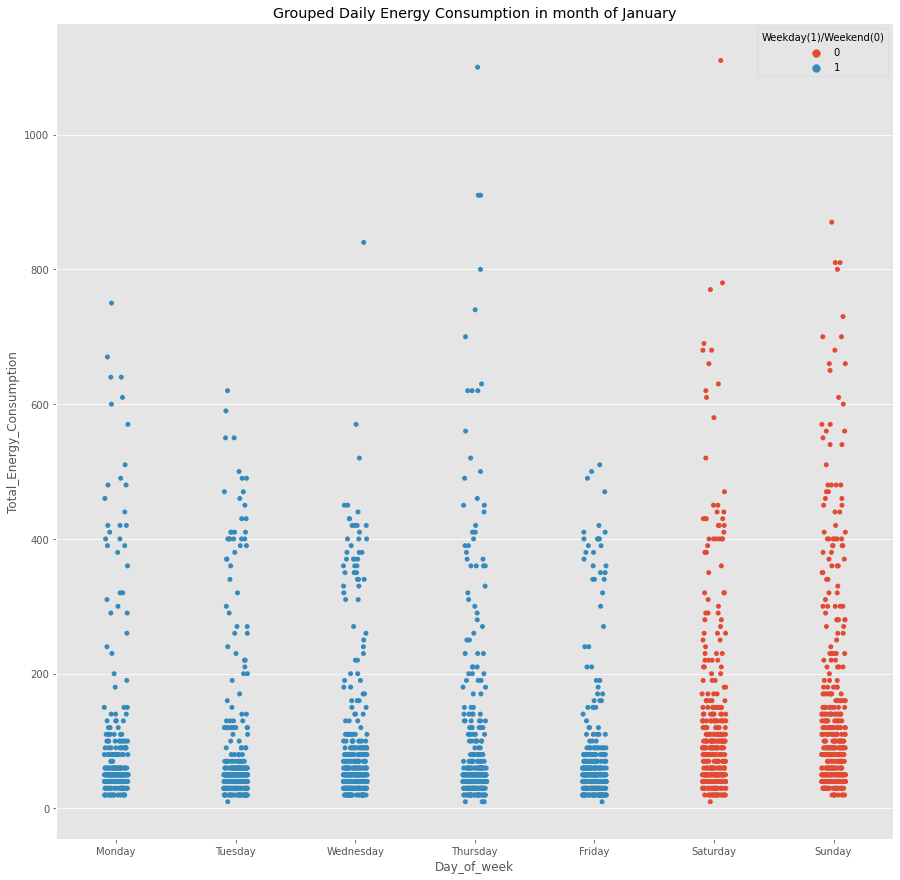

In [35]:
fig2 = plt.subplots(figsize=(15,15))
j = sns.stripplot(x='Day_of_week', y='Total_Energy_Consumption', data=jan,
                  hue='Weekday(1)/Weekend(0)')     
plt.title("Grouped Daily Energy Consumption in month of January")

Text(0.5, 1.0, 'Grouped Daily Energy Consumption in month of February')

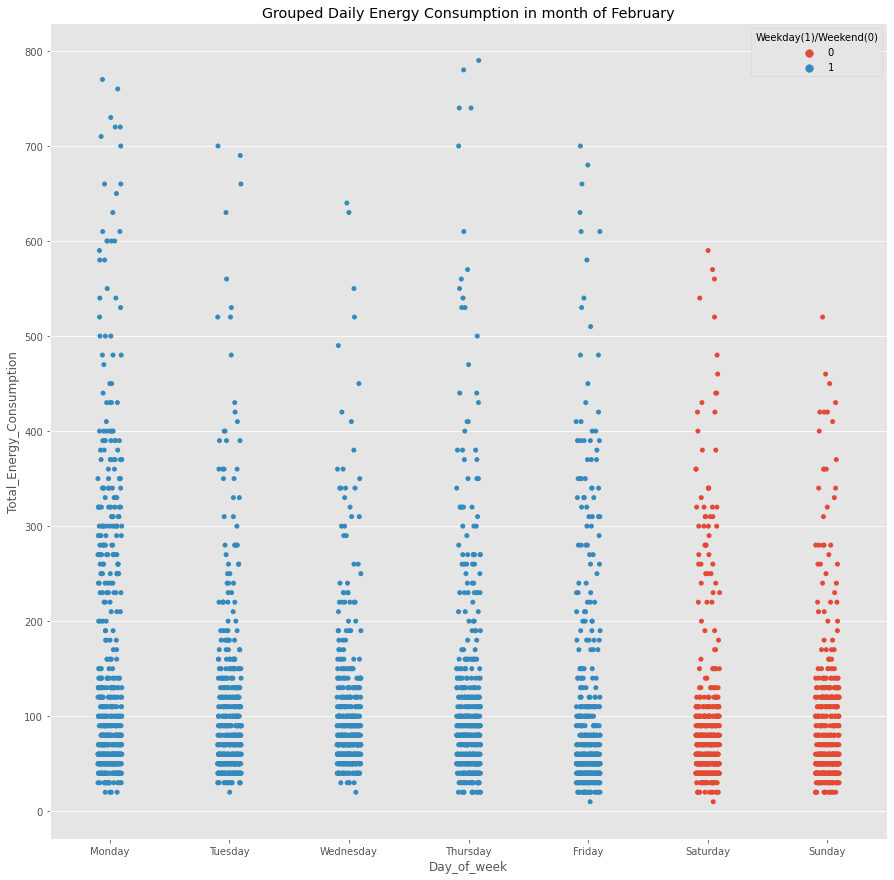

In [36]:
fig2 = plt.subplots(figsize=(15,15))
j = sns.stripplot(x='Day_of_week', y='Total_Energy_Consumption', data=feb,
                  hue='Weekday(1)/Weekend(0)', edgecolor='gray')     
plt.title("Grouped Daily Energy Consumption in month of February")

Text(0.5, 1.0, 'Grouped Daily Energy Consumption in month of March')

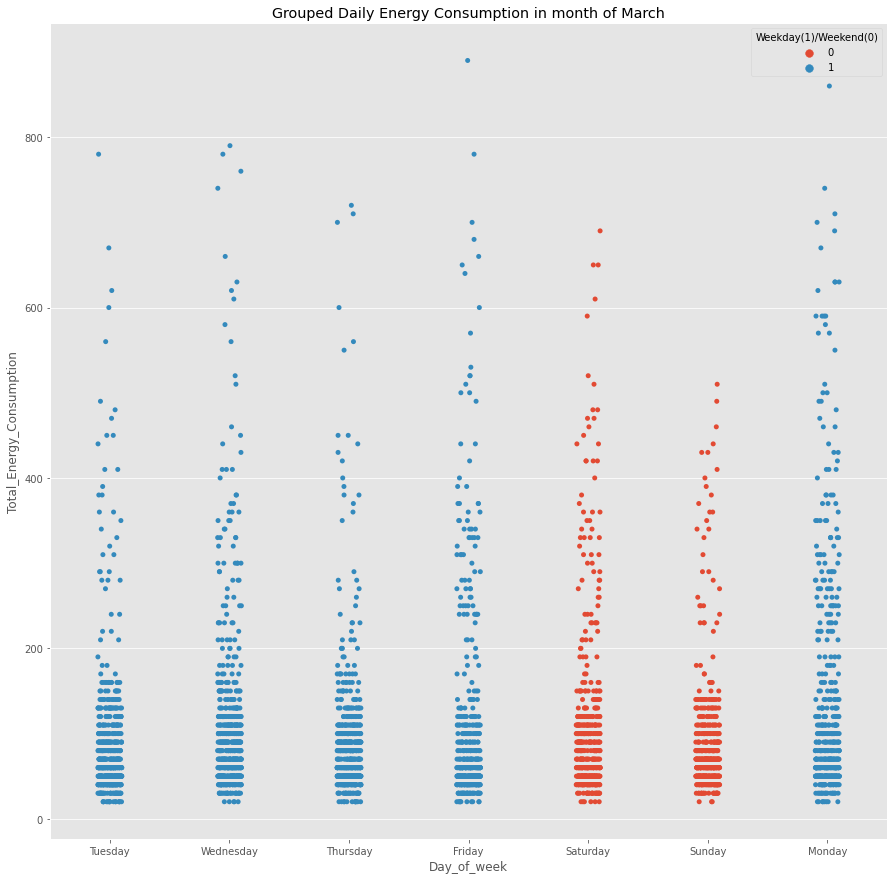

In [37]:
fig2 = plt.subplots(figsize=(15,15))
j = sns.stripplot(x='Day_of_week', y='Total_Energy_Consumption', data=mar,
                  hue='Weekday(1)/Weekend(0)', edgecolor='gray')     
plt.title("Grouped Daily Energy Consumption in month of March")

Text(0.5, 1.0, 'Grouped Daily Energy Consumption in month of April')

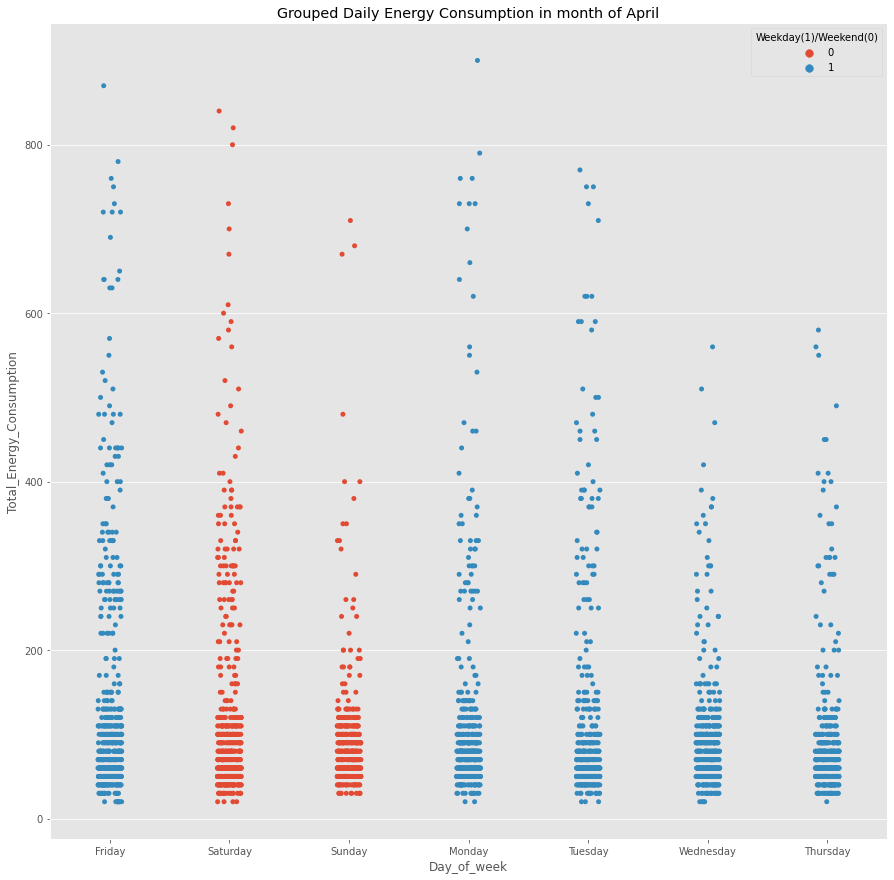

In [38]:
fig2 = plt.subplots(figsize=(15,15))
j = sns.stripplot(x='Day_of_week', y='Total_Energy_Consumption', data=apr,
                  hue='Weekday(1)/Weekend(0)', edgecolor='gray')     
plt.title("Grouped Daily Energy Consumption in month of April")

Text(0.5, 1.0, 'Grouped Daily Energy Consumption in month of May')

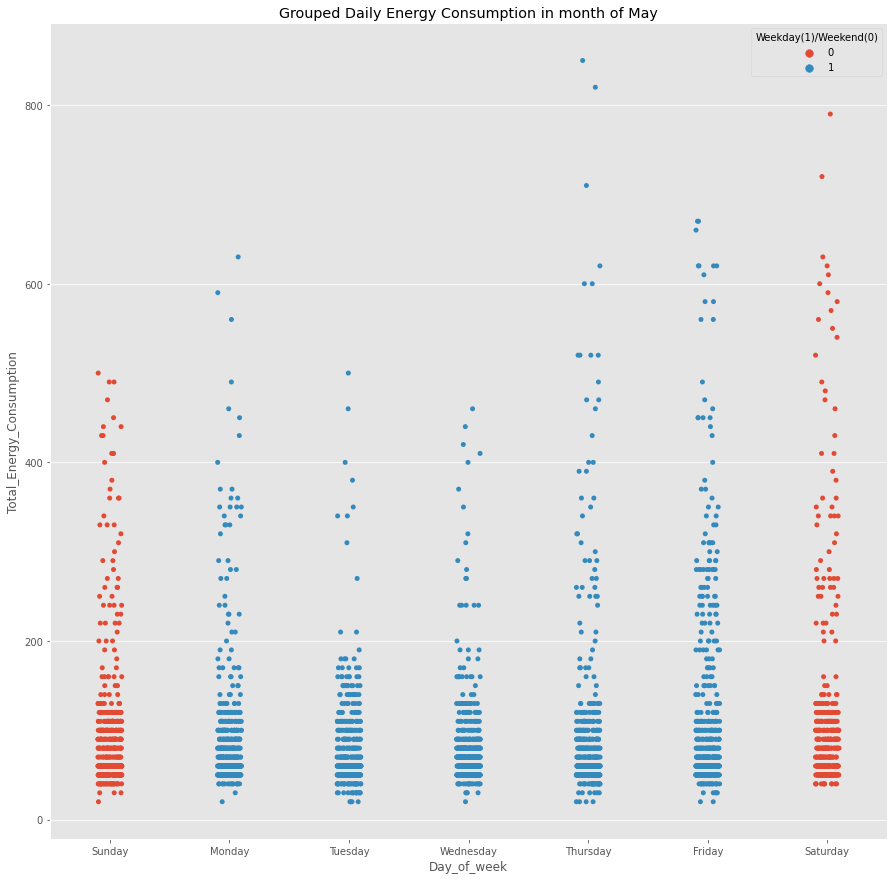

In [39]:
fig2 = plt.subplots(figsize=(15,15))
j = sns.stripplot(x='Day_of_week', y='Total_Energy_Consumption', data=may,
                  hue='Weekday(1)/Weekend(0)', edgecolor='gray')     
plt.title("Grouped Daily Energy Consumption in month of May")

##Let's plot graph based on **HOUR, DAY, WEEK and DAYS OF WEEK**
As an amateur I have created dataframes for hour,day,week for each month.                                                                  
This assisted me plotting graphs without any hassle.                     
I used ```.resample()``` API to group data according to time intervals viz. *Hour, Day, Week*.                                                  
Then plotted stripplot and barplot fro the same.


###For ***January***

In [197]:
jan_hour = pd.DataFrame(jan.resample('H',on='Date').Total_Energy_Consumption
                        .sum())                                                  #grouped Total Energy Consumption for each hour 
jan_hour.reset_index(level=0, inplace=True)
jan_hour["Hour"] = jan_hour.Date.dt.hour
jan_hour["Day"] = jan_hour.Date.dt.day
jan_hour

Date  Total_Energy_Consumption  Hour  Day
0   2016-01-11 17:00:00                       540    17   11
1   2016-01-11 18:00:00                      1370    18   11
2   2016-01-11 19:00:00                      1190    19   11
3   2016-01-11 20:00:00                       960    20   11
4   2016-01-11 21:00:00                       760    21   11
..                  ...                       ...   ...  ...
482 2016-01-31 19:00:00                       860    19   31
483 2016-01-31 20:00:00                      1070    20   31
484 2016-01-31 21:00:00                       690    21   31
485 2016-01-31 22:00:00                       490    22   31
486 2016-01-31 23:00:00                       290    23   31

[487 rows x 4 columns]

In [232]:
jan_day = pd.DataFrame(jan.resample('D',on='Date').Total_Energy_Consumption
                       .sum())                                                   #grouped Total Energy Consumption for each day
jan_day.reset_index(level=0, inplace=True)
jan_day['Day'] = jan_day.Date.dt.day
jan_day['Day_name'] = jan_day.Date.dt.day_name()
add_week_of_month(jan_day)
jan_day

Date  Total_Energy_Consumption  Day   Day_name  week_in_month
0  2016-01-11                      7000   11     Monday              2
1  2016-01-12                     12950   12    Tuesday              2
2  2016-01-13                     14750   13  Wednesday              2
3  2016-01-14                     22520   14   Thursday              2
4  2016-01-15                     18910   15     Friday              3
5  2016-01-16                     19190   16   Saturday              3
6  2016-01-17                     21260   17     Sunday              3
7  2016-01-18                     14020   18     Monday              3
8  2016-01-19                     12380   19    Tuesday              3
9  2016-01-20                     17320   20  Wednesday              3
10 2016-01-21                     13930   21   Thursday              3
11 2016-01-22                      6680   22     Friday              4
12 2016-01-23                     14100   23   Saturday              4
13 2016-01-24                     23070   24     Sunday              4
14 2016-01-25                      9820   25     Monday              4
15 2016-01-26                     10790   26    Tuesday              4
16 2016-01-27                      6660   27  Wednesday              4
17 2016-01-28                      5400   28   Thursday              4
18 2016-01-29                      7020   29     Friday              5
19 2016-01-30                     19220   30   Saturday              5
20 2016-01-31                     20320   31     Sunday              5

In [206]:
jan_week = pd.DataFrame(jan.resample('W-MON',on='Date').Total_Energy_Consumption
                        .sum())                                                  #grouped Total Energy Consumption for each week
jan_week.reset_index(level=0, inplace=True)
jan_week["Day"] = jan_week.Date.dt.day
add_week_of_month(jan_week)
jan_week = jan_week[jan_week.Date!='2016-02-01 00:00:00']
jan_week

Date  Total_Energy_Consumption  Day  week_in_month
0 2016-01-11                      7000   11              2
1 2016-01-18                    123600   18              3
2 2016-01-25                     97300   25              4

Text(0.5, 1.0, 'Hourly Energy Consumption In January')

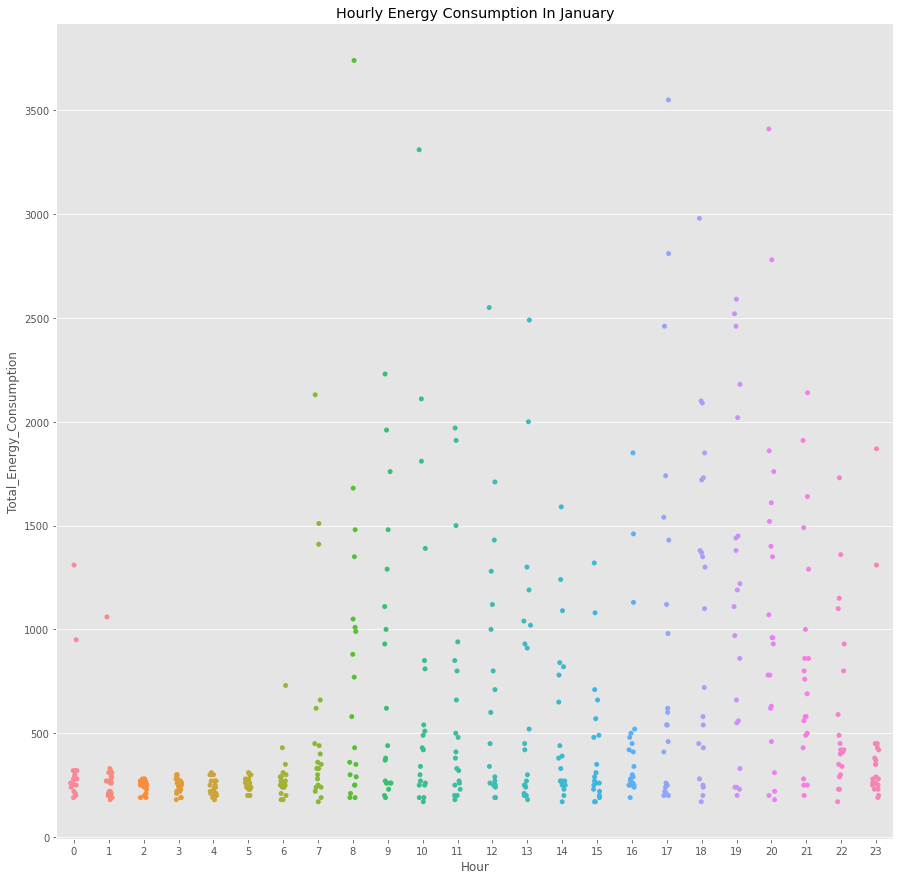

In [103]:
fig3 = plt.figure(figsize=(15,15))
sns.stripplot(x='Hour',y='Total_Energy_Consumption',data=jan_hour)
plt.title("Hourly Energy Consumption In January")

Text(0.5, 1.0, 'Daily Energy Consumption In January')

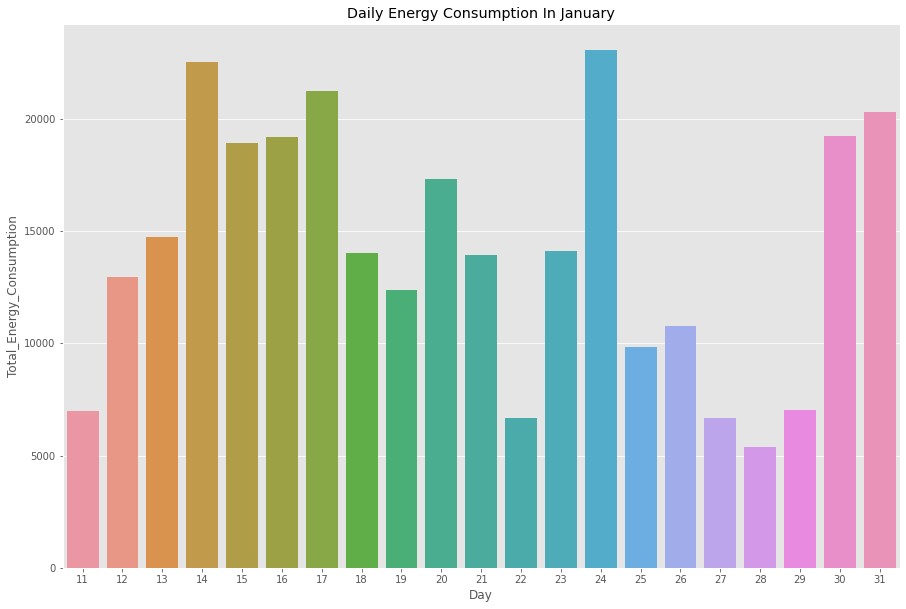

In [198]:
fig3 = plt.figure(figsize=(15,10))
jh = sns.barplot(x='Day',y='Total_Energy_Consumption',data=jan_day)
plt.title("Daily Energy Consumption In January")

Text(0.5, 1.0, 'Weekly Energy Consumption In January')

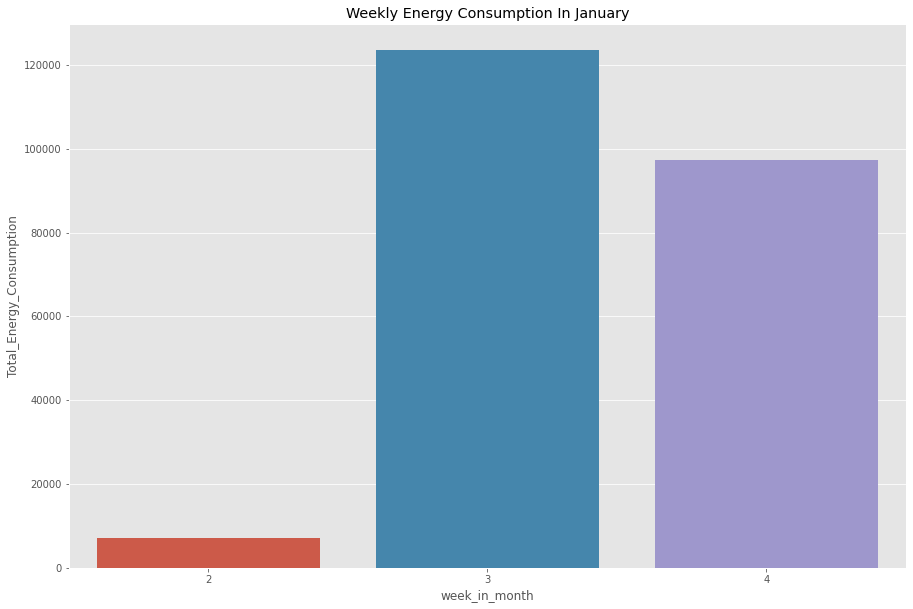

In [208]:
fig3 = plt.figure(figsize=(15,10))
jh = sns.barplot(x='week_in_month',y='Total_Energy_Consumption',data=jan_week)
plt.title("Weekly Energy Consumption In January")

Text(0.5, 1.0, 'Day-wise Weekly Energy Consumption in January')

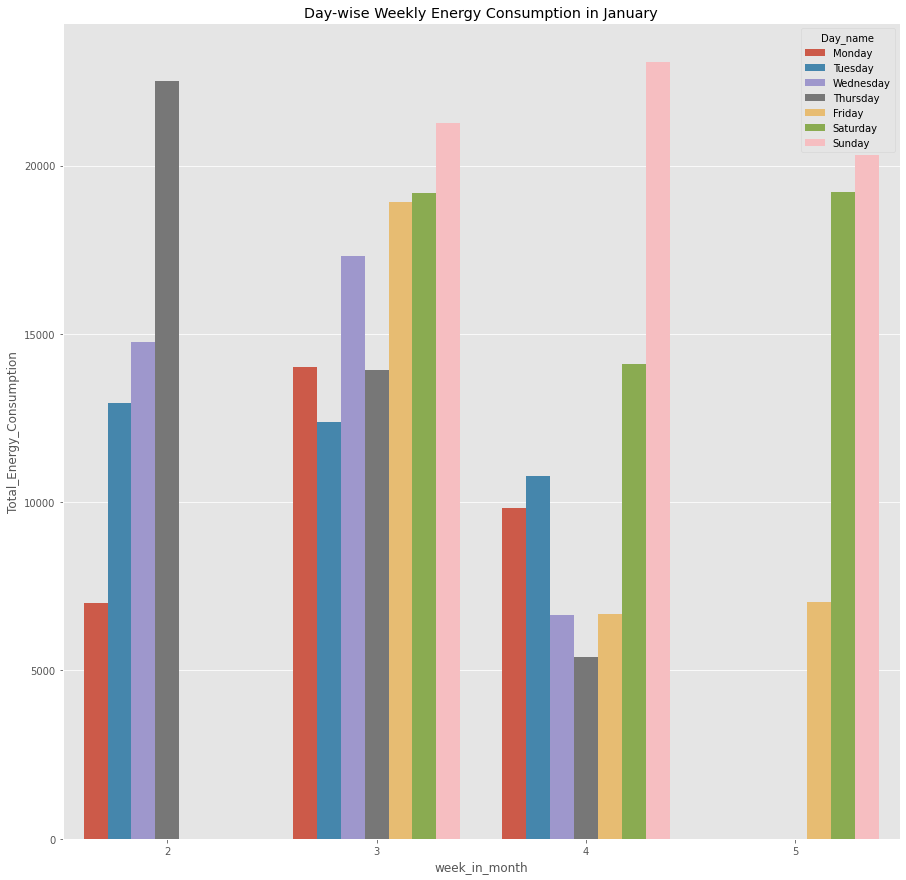

In [234]:
fig3 = plt.figure(figsize=(15,15))
sns.barplot(x='week_in_month',y='Total_Energy_Consumption',data=jan_day,
            hue='Day_name')
plt.title("Day-wise Weekly Energy Consumption in January")

In [115]:
# jan_month = pd.DataFrame(jan.resample('M',on='Date').Total_Energy_Consumption.sum())
# jan_month.reset_index(level=0,inplace=True)
# jan_month

In [118]:
feb_hour = pd.DataFrame(feb.resample('H',on='Date').Total_Energy_Consumption
                        .sum())                                                  #grouped Total Energy Consumption for each hour
feb_hour.reset_index(level=0,inplace=True)
feb_hour["Hour"] = feb_hour.Date.dt.hour
feb_hour

Date  Total_Energy_Consumption  Hour
0   2016-02-01 00:00:00                       290     0
1   2016-02-01 01:00:00                       340     1
2   2016-02-01 02:00:00                       300     2
3   2016-02-01 03:00:00                       360     3
4   2016-02-01 04:00:00                       340     4
..                  ...                       ...   ...
691 2016-02-29 19:00:00                       630    19
692 2016-02-29 20:00:00                       790    20
693 2016-02-29 21:00:00                       740    21
694 2016-02-29 22:00:00                       570    22
695 2016-02-29 23:00:00                       410    23

[696 rows x 3 columns]

In [230]:
feb_day = pd.DataFrame(feb.resample('D',on='Date').Total_Energy_Consumption
                       .sum())                                                   #grouped Total Energy Consumption for each day
feb_day.reset_index(level=0,inplace=True)
feb_day["Day"] = feb_day.Date.dt.day
feb_day["Day_name"] = feb_day.Date.dt.day_name()
add_week_of_month(feb_day)
feb_day

Date  Total_Energy_Consumption  Day   Day_name  week_in_month
0  2016-02-01                     24570    1     Monday              1
1  2016-02-02                     13370    2    Tuesday              1
2  2016-02-03                     20320    3  Wednesday              1
3  2016-02-04                     15810    4   Thursday              1
4  2016-02-05                      9360    5     Friday              1
5  2016-02-06                     12290    6   Saturday              1
6  2016-02-07                     12220    7     Sunday              1
7  2016-02-08                     22660    8     Monday              2
8  2016-02-09                     18580    9    Tuesday              2
9  2016-02-10                     14630   10  Wednesday              2
10 2016-02-11                     16220   11   Thursday              2
11 2016-02-12                     17540   12     Friday              2
12 2016-02-13                     14260   13   Saturday              2
13 2016-02-14                     16360   14     Sunday              2
14 2016-02-15                     18600   15     Monday              3
15 2016-02-16                     14260   16    Tuesday              3
16 2016-02-17                      9830   17  Wednesday              3
17 2016-02-18                     12900   18   Thursday              3
18 2016-02-19                     17350   19     Friday              3
19 2016-02-20                     15040   20   Saturday              3
20 2016-02-21                     14540   21     Sunday              3
21 2016-02-22                     14570   22     Monday              4
22 2016-02-23                     13800   23    Tuesday              4
23 2016-02-24                     11900   24  Wednesday              4
24 2016-02-25                     19700   25   Thursday              4
25 2016-02-26                     13810   26     Friday              4
26 2016-02-27                     12290   27   Saturday              4
27 2016-02-28                      7810   28     Sunday              4
28 2016-02-29                     23390   29     Monday              5

In [ ]:
feb_week = pd.DataFrame(feb.resample('W-MON',on='Date').Total_Energy_Consumption
                        .sum())                                                  #grouped Total Energy Consumption for each week
feb_week.reset_index(level=0,inplace=True)
feb_week['Day'] = feb_week.Date.dt.day
add_week_of_month(feb_week)
feb_week

Date  Total_Energy_Consumption  Day  week_in_month
0 2016-02-01                     24570    1              1
1 2016-02-08                    106030    8              2
2 2016-02-15                    116190   15              3
3 2016-02-22                     98490   22              4
4 2016-02-29                    102700   29              5

Text(0.5, 1.0, 'Hourly Energy Consumption in February')

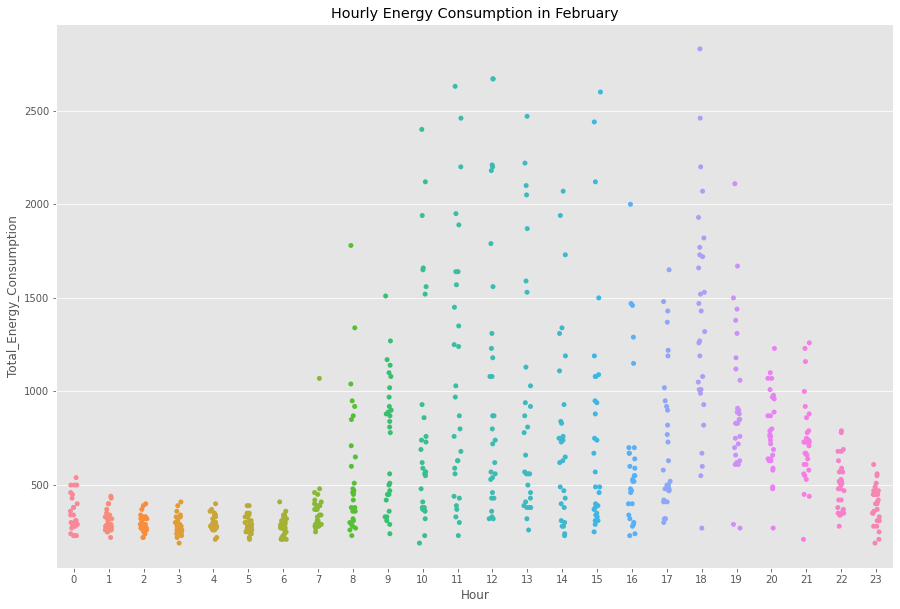

In [121]:
fig3 = plt.figure(figsize=(15,10))
sns.stripplot(x='Hour',y='Total_Energy_Consumption',data=feb_hour)
plt.title("Hourly Energy Consumption in February")

Text(0.5, 1.0, 'Daily Energy Consumption in February')

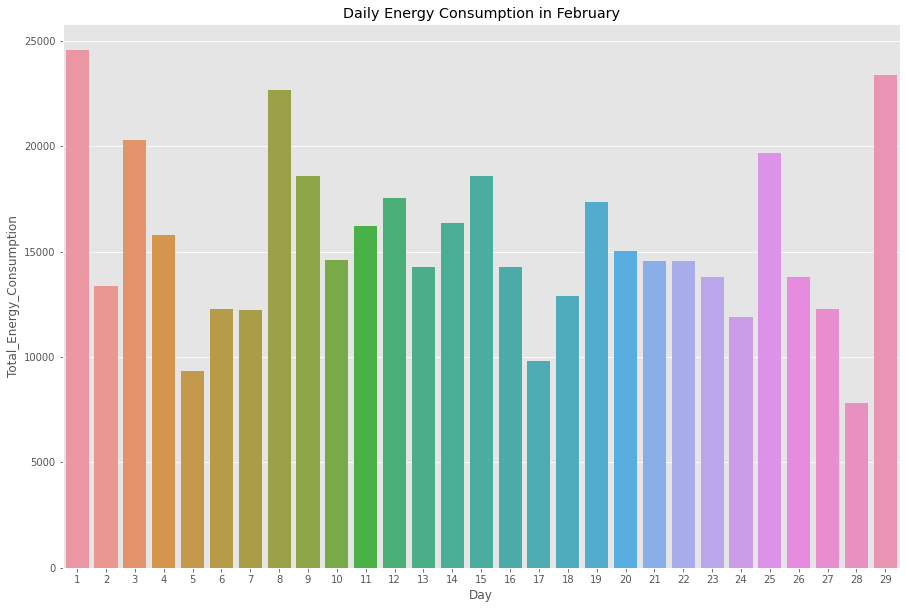

In [127]:
fig3 = plt.figure(figsize=(15,10))
sns.barplot(x='Day',y='Total_Energy_Consumption',data=feb_day)
plt.title("Daily Energy Consumption in February")

Text(0.5, 1.0, 'Weekly Energy Consumption in February')

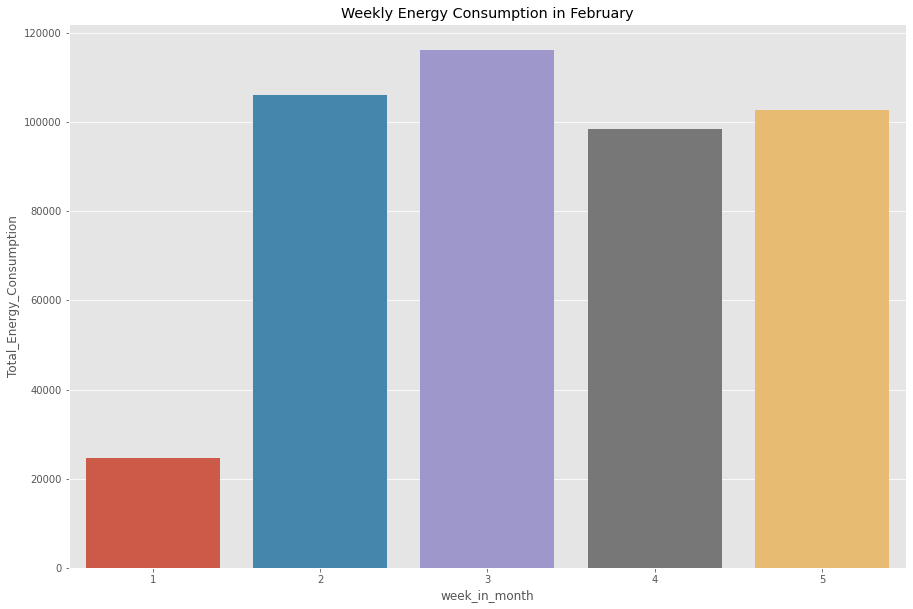

In [136]:
fig3 = plt.figure(figsize=(15,10))
sns.barplot(x='week_in_month',y='Total_Energy_Consumption',data=feb_week)
plt.title("Weekly Energy Consumption in February")

Text(0.5, 1.0, 'Day-wise Weekly Energy Consumption in February')

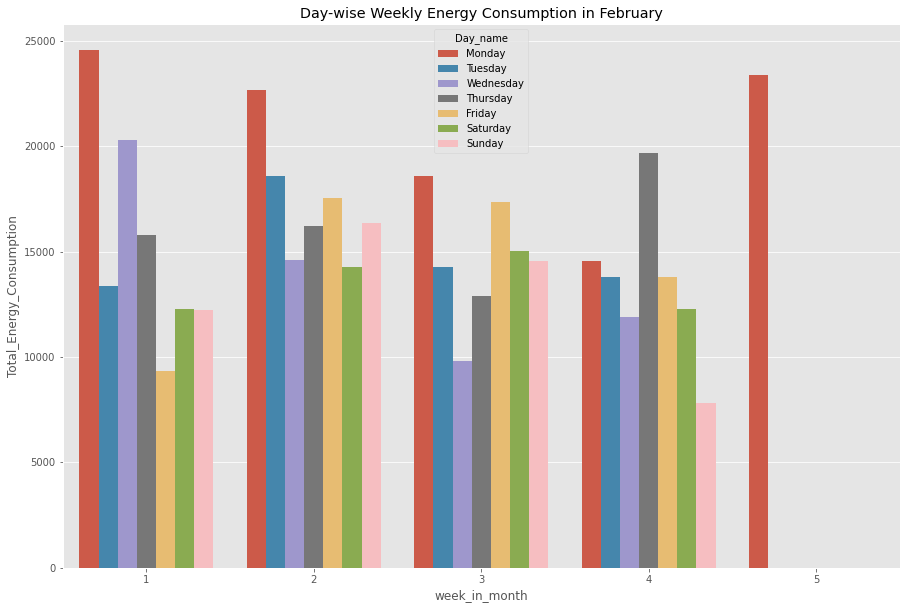

In [231]:
fig3 = plt.figure(figsize=(15,10))
sns.barplot(x='week_in_month',y='Total_Energy_Consumption',data=feb_day,
            hue='Day_name')
plt.title("Day-wise Weekly Energy Consumption in February")

In [137]:
# jan.resample('M',on='Date').Total_Energy_Consumption.sum()

In [138]:
mar_hour = pd.DataFrame(mar.resample('H',on='Date').Total_Energy_Consumption
                        .sum())                                                  #grouped Total Energy Consumption for each hour
mar_hour.reset_index(level=0,inplace=True)
mar_hour["Hour"] = mar_hour.Date.dt.hour
mar_hour

Date  Total_Energy_Consumption  Hour
0   2016-03-01 00:00:00                       410     0
1   2016-03-01 01:00:00                       380     1
2   2016-03-01 02:00:00                       240     2
3   2016-03-01 03:00:00                       270     3
4   2016-03-01 04:00:00                       220     4
..                  ...                       ...   ...
739 2016-03-31 19:00:00                       660    19
740 2016-03-31 20:00:00                       650    20
741 2016-03-31 21:00:00                       280    21
742 2016-03-31 22:00:00                       330    22
743 2016-03-31 23:00:00                       320    23

[744 rows x 3 columns]

In [227]:
mar_day = pd.DataFrame(mar.resample('D',on='Date').Total_Energy_Consumption
                       .sum())                                                   #grouped Total Energy Consumption for each day
mar_day.reset_index(level=0,inplace=True)
mar_day["Day"] = mar_day.Date.dt.day
mar_day["Day_name"] = mar_day.Date.dt.day_name()
add_week_of_month(mar_day)
mar_day

Date  Total_Energy_Consumption  Day   Day_name  week_in_month
0  2016-03-01                     11050    1    Tuesday              1
1  2016-03-02                     13960    2  Wednesday              1
2  2016-03-03                     12860    3   Thursday              1
3  2016-03-04                     14040    4     Friday              1
4  2016-03-05                     13740    5   Saturday              1
5  2016-03-06                     13530    6     Sunday              1
6  2016-03-07                     21100    7     Monday              1
7  2016-03-08                     11610    8    Tuesday              2
8  2016-03-09                     13360    9  Wednesday              2
9  2016-03-10                     14280   10   Thursday              2
10 2016-03-11                     10680   11     Friday              2
11 2016-03-12                     14590   12   Saturday              2
12 2016-03-13                     10110   13     Sunday              2
13 2016-03-14                     24270   14     Monday              2
14 2016-03-15                     14820   15    Tuesday              3
15 2016-03-16                     24050   16  Wednesday              3
16 2016-03-17                     13590   17   Thursday              3
17 2016-03-18                      9110   18     Friday              3
18 2016-03-19                     16550   19   Saturday              3
19 2016-03-20                     16280   20     Sunday              3
20 2016-03-21                     12060   21     Monday              3
21 2016-03-22                     10590   22    Tuesday              4
22 2016-03-23                     13030   23  Wednesday              4
23 2016-03-24                     10590   24   Thursday              4
24 2016-03-25                     26260   25     Friday              4
25 2016-03-26                     16090   26   Saturday              4
26 2016-03-27                     10600   27     Sunday              4
27 2016-03-28                     18550   28     Monday              4
28 2016-03-29                     13910   29    Tuesday              5
29 2016-03-30                     13250   30  Wednesday              5
30 2016-03-31                     11680   31   Thursday              5

In [159]:
mar_week = pd.DataFrame(mar.resample('W-TUE',on='Date').Total_Energy_Consumption
                        .sum())                                                  #grouped Total Energy Consumption for each week
mar_week.reset_index(level=0,inplace=True)
mar_week['Day'] = mar_week.Date.dt.day
add_week_of_month(mar_week)
mar_week = mar_week[mar_week.Date!='2016-04-05 00:00:00']
mar_week

Date  Total_Energy_Consumption  Day  week_in_month
0 2016-03-01                     11050    1              1
1 2016-03-08                    100840    8              2
2 2016-03-15                    102110   15              3
3 2016-03-22                    102230   22              4
4 2016-03-29                    109030   29              5

Text(0.5, 1.0, 'Hourly Energy Consumption in March')

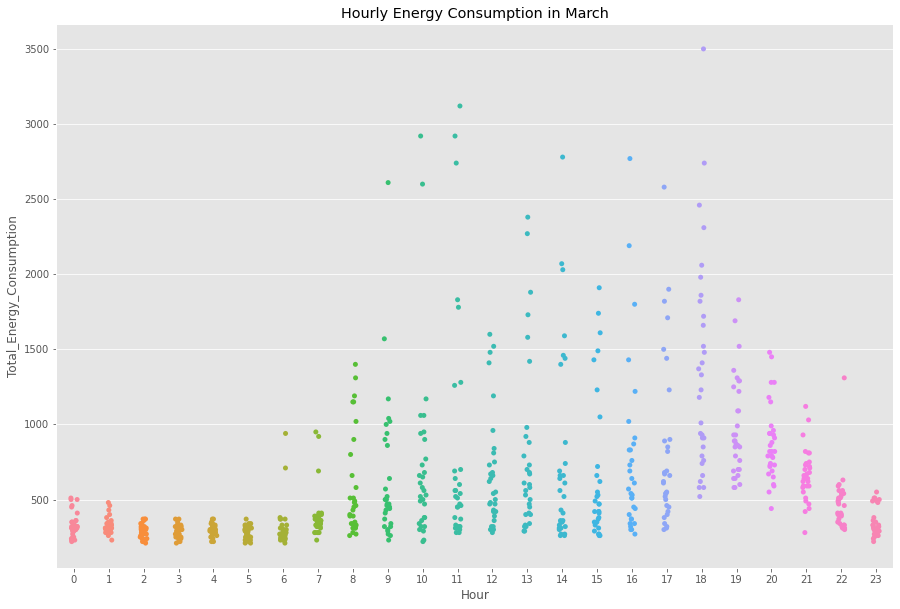

In [160]:
fig3 = plt.figure(figsize=(15,10))
sns.stripplot(x='Hour',y='Total_Energy_Consumption',data=mar_hour)
plt.title("Hourly Energy Consumption in March")

Text(0.5, 1.0, 'Daily Energy Consumption in March')

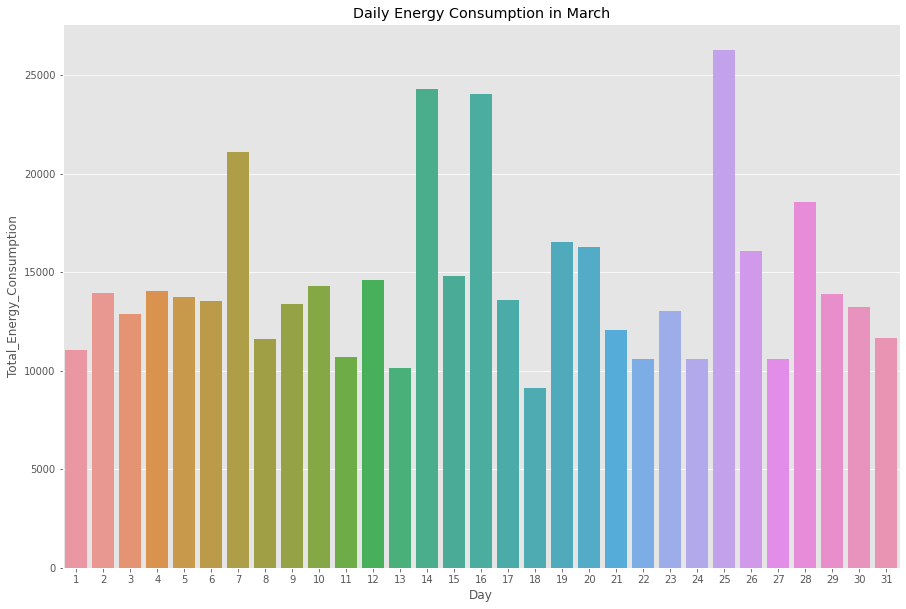

In [163]:
fig3 = plt.figure(figsize=(15,10))
sns.barplot(x='Day',y='Total_Energy_Consumption',data=mar_day)
plt.title("Daily Energy Consumption in March")

Text(0.5, 1.0, 'Weekly Energy Consumption in March')

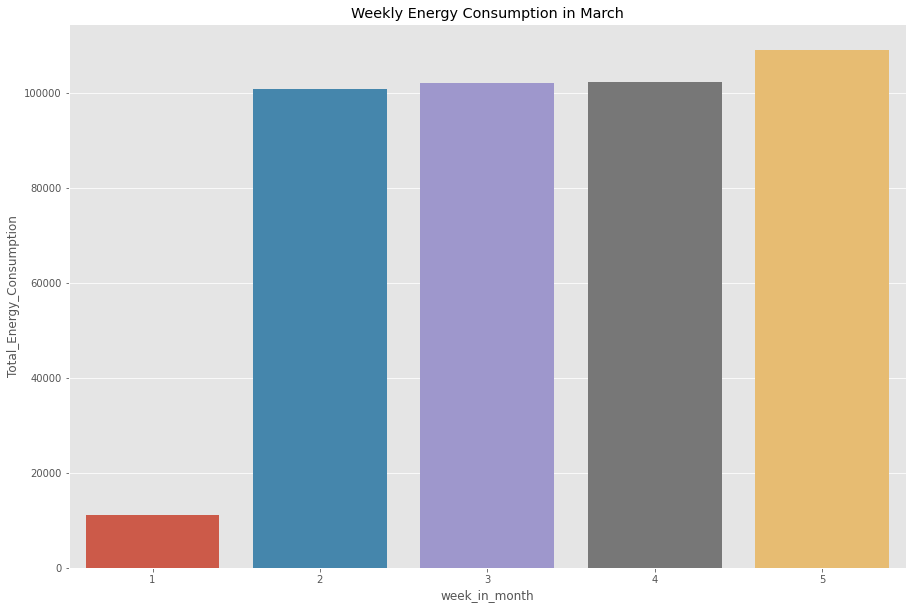

In [165]:
fig3 = plt.figure(figsize=(15,10))
sns.barplot(x='week_in_month',y='Total_Energy_Consumption',data=mar_week)
plt.title("Weekly Energy Consumption in March")

Text(0.5, 1.0, 'Day-wise Weekly Energy Consumption in March')

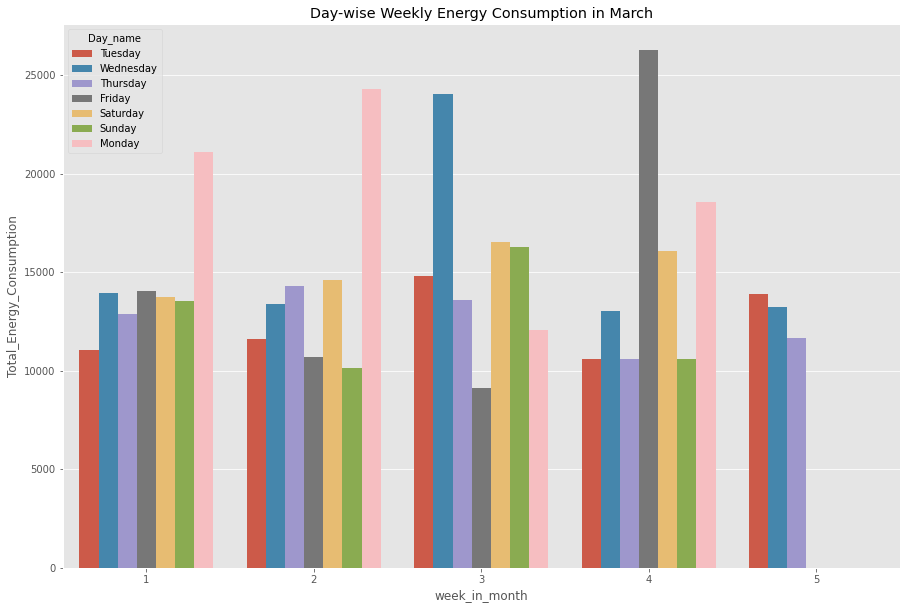

In [228]:
fig3 = plt.figure(figsize=(15,10))
sns.barplot(x='week_in_month',y='Total_Energy_Consumption',data=mar_day,
            hue='Day_name')
plt.title("Day-wise Weekly Energy Consumption in March")

In [166]:
apr_hour = pd.DataFrame(apr.resample('H',on='Date').Total_Energy_Consumption
                        .sum())                                                  #grouped Total Energy Consumption for each hour
apr_hour.reset_index(level=0,inplace=True)
apr_hour["Hour"] = apr_hour.Date.dt.hour
apr_hour

Date  Total_Energy_Consumption  Hour
0   2016-04-01 00:00:00                       270     0
1   2016-04-01 01:00:00                       230     1
2   2016-04-01 02:00:00                       320     2
3   2016-04-01 03:00:00                       320     3
4   2016-04-01 04:00:00                       310     4
..                  ...                       ...   ...
715 2016-04-30 19:00:00                       370    19
716 2016-04-30 20:00:00                       430    20
717 2016-04-30 21:00:00                       420    21
718 2016-04-30 22:00:00                       450    22
719 2016-04-30 23:00:00                       180    23

[720 rows x 3 columns]

In [219]:
apr_day = pd.DataFrame(apr.resample('D',on='Date').Total_Energy_Consumption
                       .sum())                                                   #grouped Total Energy Consumption for each day
apr_day.reset_index(level=0,inplace=True)
apr_day["Day"] = apr_day.Date.dt.day
apr_day["Day_name"] = apr_day.Date.dt.day_name()
add_week_of_month(apr_day)
apr_day

Date  Total_Energy_Consumption  Day   Day_name  week_in_month
0  2016-04-01                      8530    1     Friday              1
1  2016-04-02                      7300    2   Saturday              1
2  2016-04-03                     10410    3     Sunday              1
3  2016-04-04                     27690    4     Monday              1
4  2016-04-05                     22810    5    Tuesday              1
5  2016-04-06                     13460    6  Wednesday              1
6  2016-04-07                     10020    7   Thursday              1
7  2016-04-08                     19600    8     Friday              2
8  2016-04-09                     15350    9   Saturday              2
9  2016-04-10                     10790   10     Sunday              2
10 2016-04-11                     11720   11     Monday              2
11 2016-04-12                     16250   12    Tuesday              2
12 2016-04-13                     14100   13  Wednesday              2
13 2016-04-14                     13050   14   Thursday              2
14 2016-04-15                     19280   15     Friday              3
15 2016-04-16                     19370   16   Saturday              3
16 2016-04-17                     16020   17     Sunday              3
17 2016-04-18                     11050   18     Monday              3
18 2016-04-19                     10770   19    Tuesday              3
19 2016-04-20                     12020   20  Wednesday              3
20 2016-04-21                     11180   21   Thursday              3
21 2016-04-22                     24910   22     Friday              4
22 2016-04-23                     15210   23   Saturday              4
23 2016-04-24                     11950   24     Sunday              4
24 2016-04-25                     11910   25     Monday              4
25 2016-04-26                     10750   26    Tuesday              4
26 2016-04-27                     11560   27  Wednesday              4
27 2016-04-28                     14060   28   Thursday              4
28 2016-04-29                     16140   29     Friday              5
29 2016-04-30                     20250   30   Saturday              5

In [175]:
apr_week = pd.DataFrame(apr.resample('W-FRI',on='Date').Total_Energy_Consumption
                        .sum())                                                  #grouped Total Energy Consumption for each week
apr_week.reset_index(level=0,inplace=True)
apr_week['Day'] = apr_week.Date.dt.day
add_week_of_month(apr_week)
apr_week = apr_week[apr_week.Date!='2016-05-06 00:00:00']
apr_week

Date  Total_Energy_Consumption  Day  week_in_month
0 2016-04-01                      8530    1              1
1 2016-04-08                    111290    8              2
2 2016-04-15                    100540   15              3
3 2016-04-22                    105320   22              4
4 2016-04-29                     91580   29              5

Text(0.5, 1.0, 'Hourly Energy Consumption in April')

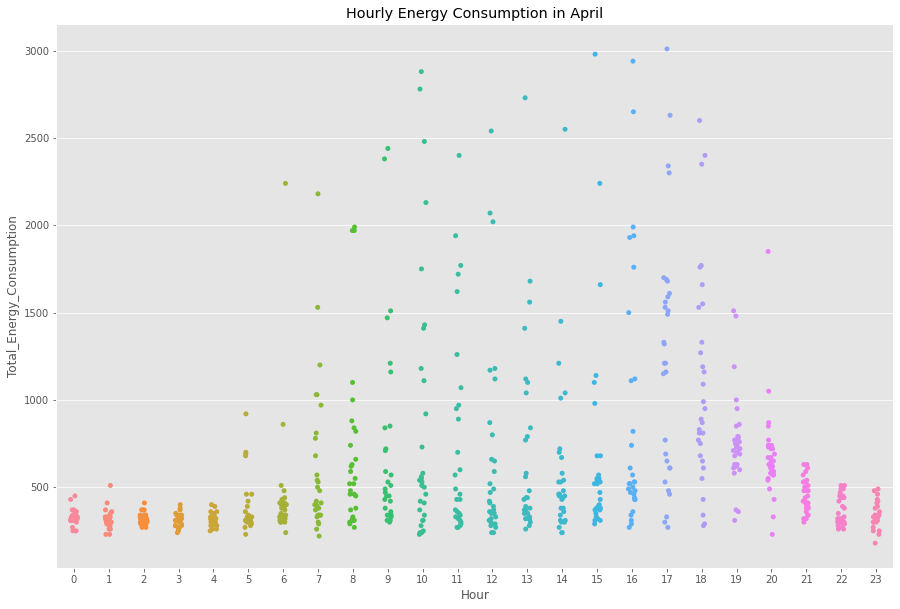

In [174]:
fig3 = plt.figure(figsize=(15,10))
sns.stripplot(x='Hour',y='Total_Energy_Consumption',data=apr_hour)
plt.title("Hourly Energy Consumption in April")

Text(0.5, 1.0, 'Daily Energy Consumption in March')

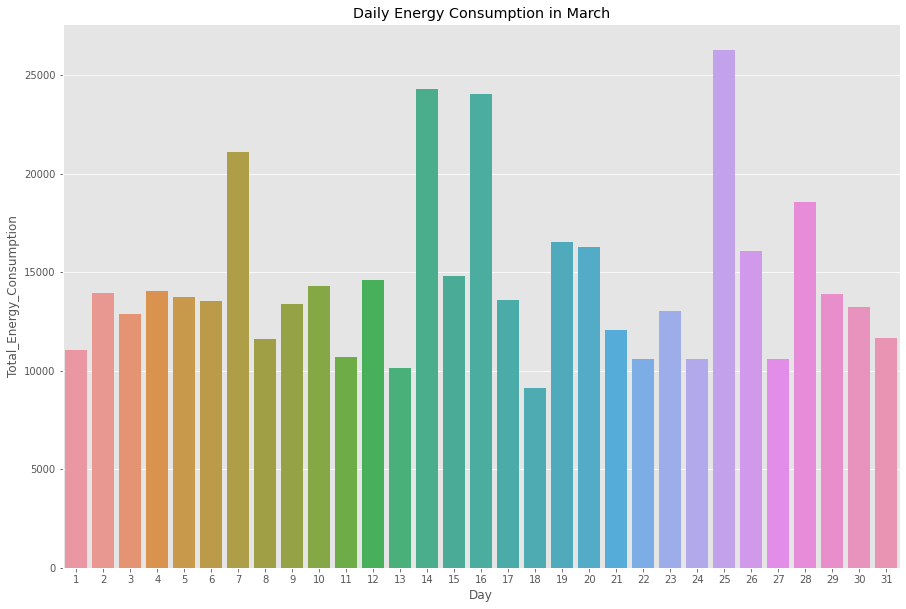

In [ ]:
fig3 = plt.figure(figsize=(15,10))
sns.barplot(x='Day',y='Total_Energy_Consumption',data=apr_day)
plt.title("Daily Energy Consumption in April")

Text(0.5, 1.0, 'Weekly Energy Consumption in April')

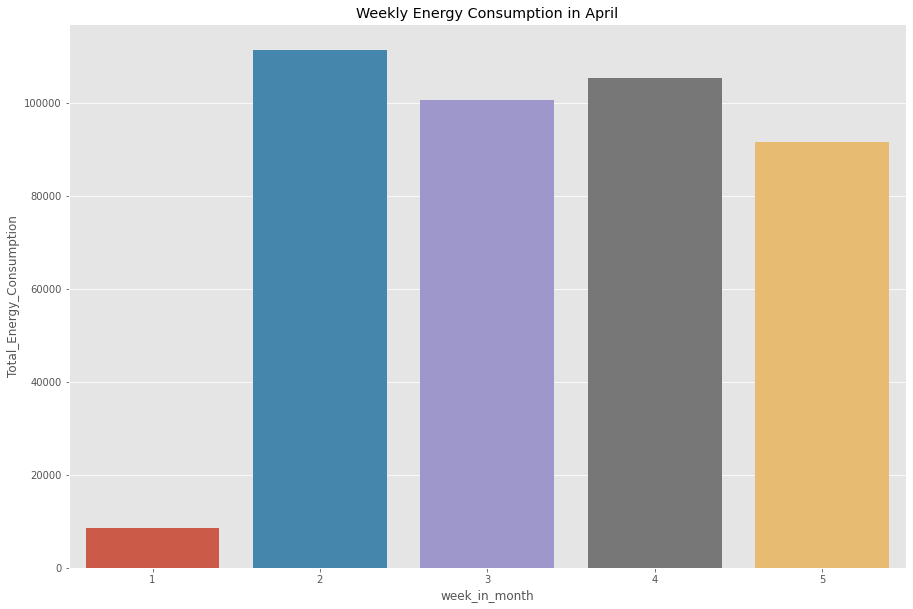

In [176]:
fig3 = plt.figure(figsize=(15,10))
sns.barplot(x='week_in_month',y='Total_Energy_Consumption',data=apr_week)
plt.title("Weekly Energy Consumption in April")

Text(0.5, 1.0, 'Day-wise Weekly Energy Consumption in April')

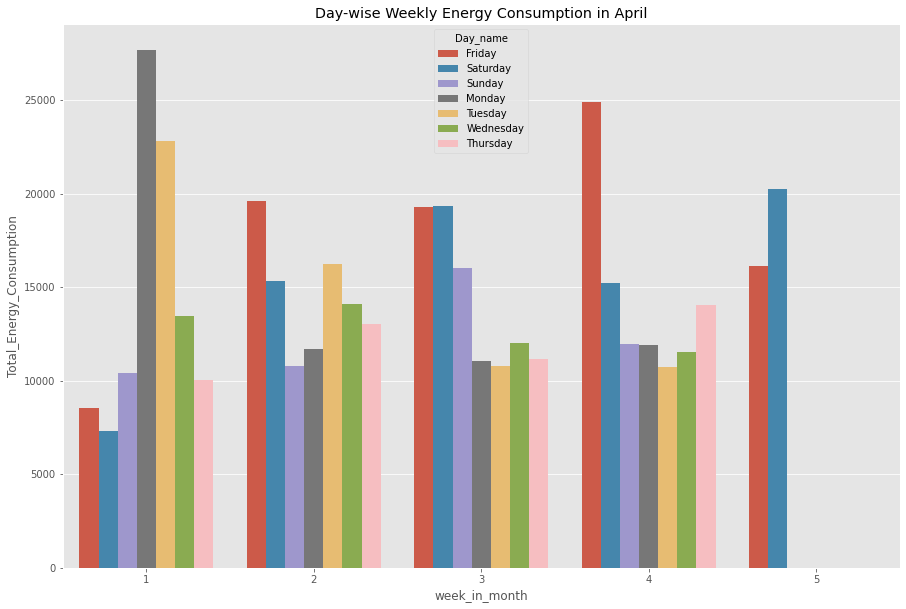

In [224]:
fig3 = plt.figure(figsize=(15,10))
sns.barplot(x='week_in_month',y='Total_Energy_Consumption',data=apr_day,
            hue='Day_name')
plt.title("Day-wise Weekly Energy Consumption in April")

In [179]:
may_hour = pd.DataFrame(may.resample('H',on='Date').Total_Energy_Consumption.sum())
may_hour.reset_index(level=0,inplace=True)
may_hour["Hour"] = may_hour.Date.dt.hour
may_hour

Date  Total_Energy_Consumption  Hour
0   2016-05-01 00:00:00                       310     0
1   2016-05-01 01:00:00                       330     1
2   2016-05-01 02:00:00                       290     2
3   2016-05-01 03:00:00                       250     3
4   2016-05-01 04:00:00                       320     4
..                  ...                       ...   ...
638 2016-05-27 14:00:00                       620    14
639 2016-05-27 15:00:00                       460    15
640 2016-05-27 16:00:00                       810    16
641 2016-05-27 17:00:00                      1100    17
642 2016-05-27 18:00:00                       440    18

[643 rows x 3 columns]

In [214]:
may_day = pd.DataFrame(may.resample('D',on='Date').Total_Energy_Consumption
                       .sum())                                                   #grouped Total Energy Consumption for each day
may_day.reset_index(level=0,inplace=True)
may_day["Day"] = may_day.Date.dt.day
may_day["Day_name"] = may_day.Date.dt.day_name()
add_week_of_month(may_day)
may_day

Date  Total_Energy_Consumption  Day   Day_name  week_in_month
0  2016-05-01                     14120    1     Sunday              1
1  2016-05-02                     12730    2     Monday              1
2  2016-05-03                     10130    3    Tuesday              1
3  2016-05-04                     11530    4  Wednesday              1
4  2016-05-05                     12210    5   Thursday              1
5  2016-05-06                     14670    6     Friday              1
6  2016-05-07                     14050    7   Saturday              1
7  2016-05-08                      9900    8     Sunday              2
8  2016-05-09                     13200    9     Monday              2
9  2016-05-10                      9550   10    Tuesday              2
10 2016-05-11                     10700   11  Wednesday              2
11 2016-05-12                     10480   12   Thursday              2
12 2016-05-13                     24750   13     Friday              2
13 2016-05-14                     14410   14   Saturday              2
14 2016-05-15                     15520   15     Sunday              3
15 2016-05-16                     14760   16     Monday              3
16 2016-05-17                      9560   17    Tuesday              3
17 2016-05-18                     12160   18  Wednesday              3
18 2016-05-19                     10110   19   Thursday              3
19 2016-05-20                     10120   20     Friday              3
20 2016-05-21                     23500   21   Saturday              3
21 2016-05-22                     15900   22     Sunday              4
22 2016-05-23                     12250   23     Monday              4
23 2016-05-24                     14460   24    Tuesday              4
24 2016-05-25                     12450   25  Wednesday              4
25 2016-05-26                     21620   26   Thursday              4
26 2016-05-27                     14930   27     Friday              4

In [217]:
may_week = pd.DataFrame(may.resample('W-SUN',on='Date').Total_Energy_Consumption
                        .sum())                                                  #grouped Total Energy Consumption for each week
may_week.reset_index(level=0,inplace=True)
may_week['Day'] = may_week.Date.dt.day
add_week_of_month(may_week)
# may_week = may_week[may_week.Date!='2016-05-06 00:00:00']
may_week

Date  Total_Energy_Consumption  Day  week_in_month
0 2016-05-01                     14120    1              1
1 2016-05-08                     85220    8              2
2 2016-05-15                     98610   15              3
3 2016-05-22                     96110   22              4
4 2016-05-29                     75710   29              5

Text(0.5, 1.0, 'Hourly Energy Consumption in May')

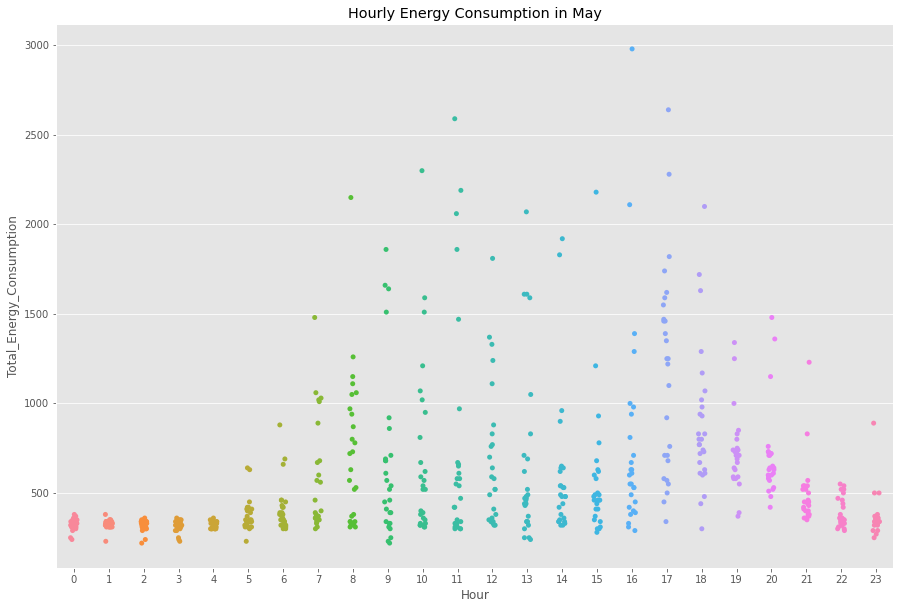

In [185]:
fig3 = plt.figure(figsize=(15,10))
sns.stripplot(x='Hour',y='Total_Energy_Consumption',data=may_hour)
plt.title("Hourly Energy Consumption in May")

Text(0.5, 1.0, 'Daily Energy Consumption in May')

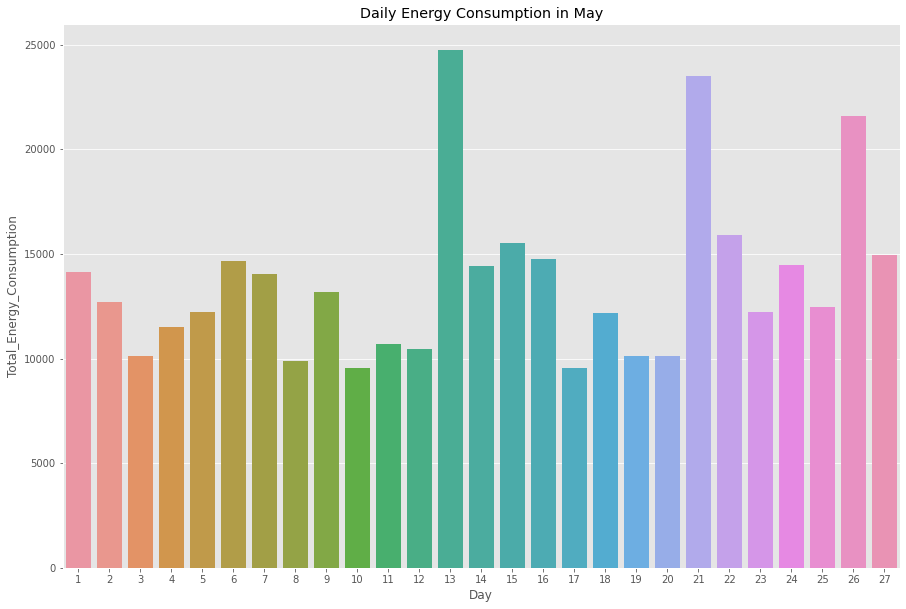

In [184]:
fig3 = plt.figure(figsize=(15,10))
sns.barplot(x='Day',y='Total_Energy_Consumption',data=may_day)
plt.title("Daily Energy Consumption in May")

Text(0.5, 1.0, 'Weekly Energy Consumption in May')

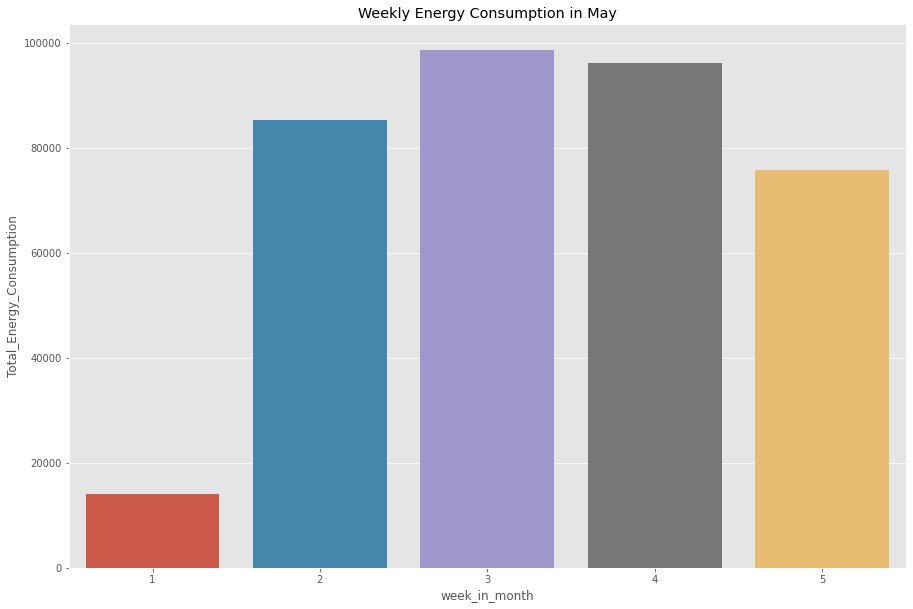

In [183]:
fig3 = plt.figure(figsize=(15,10))
sns.barplot(x='week_in_month',y='Total_Energy_Consumption',data=may_week)
plt.title("Weekly Energy Consumption in May")

Text(0.5, 1.0, 'Day-wise Weekly Energy Consumption in May')

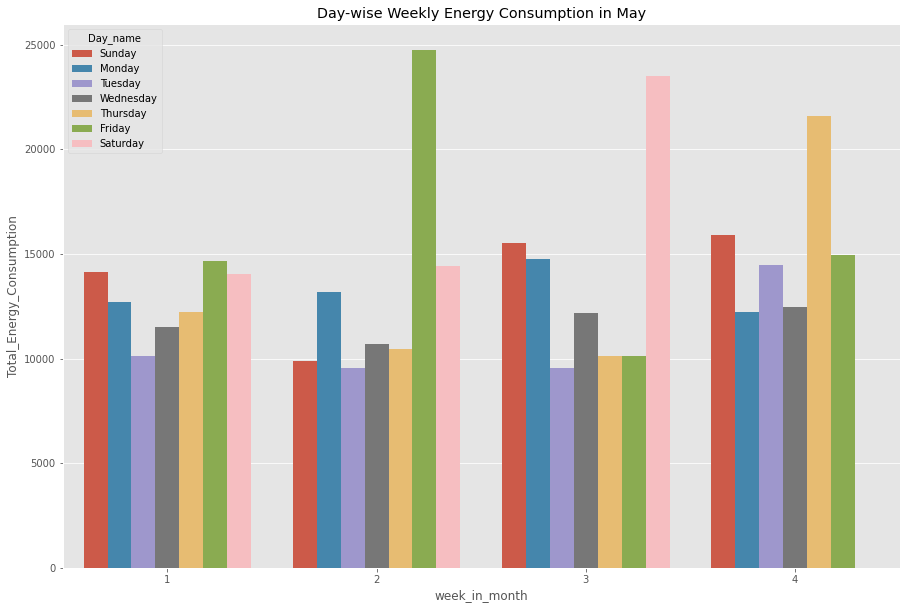

In [216]:
fig3 = plt.figure(figsize=(15,10))
sns.barplot(x='week_in_month',y='Total_Energy_Consumption',data=may_day,
            hue='Day_name')
plt.title("Day-wise Weekly Energy Consumption in May")

##Let's view what is the **Monthly** Total Energy Consumption

In [236]:
month_df = pd.DataFrame(new_df.resample('MS',on='Date').Total_Energy_Consumption
                        .sum())
month_df.reset_index(level=0,inplace=True)
month_df['Month'] = month_df.Date.dt.month_name()
month_df

Date  Total_Energy_Consumption     Month
0 2016-01-01                    297310   January
1 2016-02-01                    448040  February
2 2016-03-01                    450280     March
3 2016-04-01                    437640     April
4 2016-05-01                    369770       May

Text(0.5, 1.0, 'Monthly Energy Consumption')

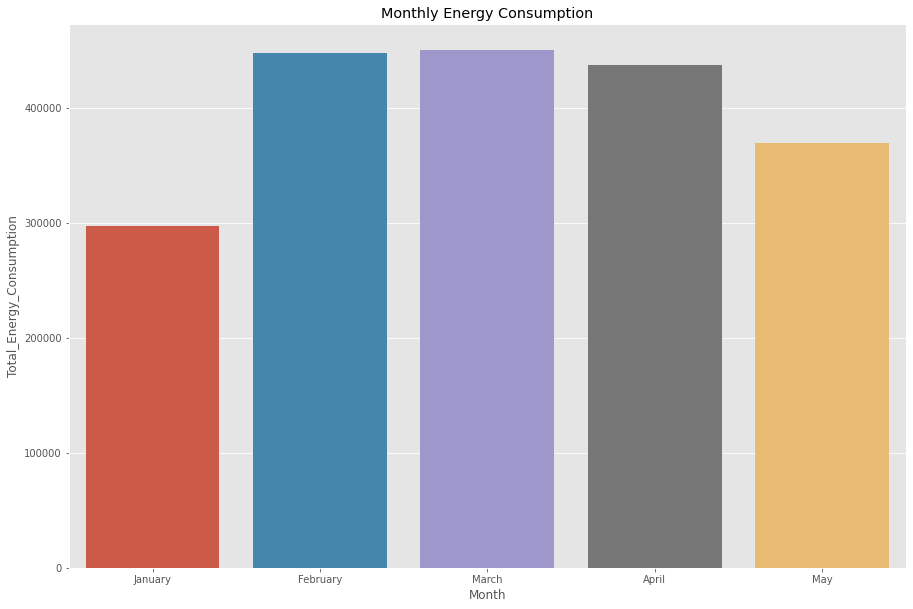

In [237]:
fig3 = plt.figure(figsize=(15,10))
sns.barplot(x='Month',y='Total_Energy_Consumption',data=month_df)
plt.title("Monthly Energy Consumption")